In [102]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# 1.获取数据

In [103]:
data = load_boston()
X = data.data
y = data.target

CRIM：城镇的人均犯罪率

ZN：大于25,000平方英尺的地块的住宅用地比例

INDUS：每个镇的非零售业务英亩的比例。RMmm

CHAS：查尔斯河虚拟变量（如果环河，则等于1；否则等于0）

NOX：一氧化氮的浓度（百万分之几）

RM：每个住宅的平均房间数

AGE：1940年之前建造的自有住房的比例

DIS：到五个波士顿就业中心的加权距离

RAD：径向公路通达性的指标

TAX：每$ 10,000的全值财产税率

PTRATIO：各镇的师生比率

B：计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例

LSTAT：底层人口的百分比

MEDV：自有住房数的中位数，单位为$ 1000

# 2.划分训练集和测试集

In [104]:
# Allocate Data Set - Training Sets and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)
train_df = pd.DataFrame(X_train, columns = data.feature_names)
test_df = pd.DataFrame(X_test, columns = data.feature_names)
# Concatenate the training and test sets of X
df = pd.concat([train_df,test_df],ignore_index=True,sort=False)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
test_set = {"y_test":y_test}
test_set = pd.DataFrame(test_set)
test_set.to_csv('y_test.csv')
df

404
102
404
102


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77


# 3.探索性数据分析

### 3.1各个特征的的特征分布直方图

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

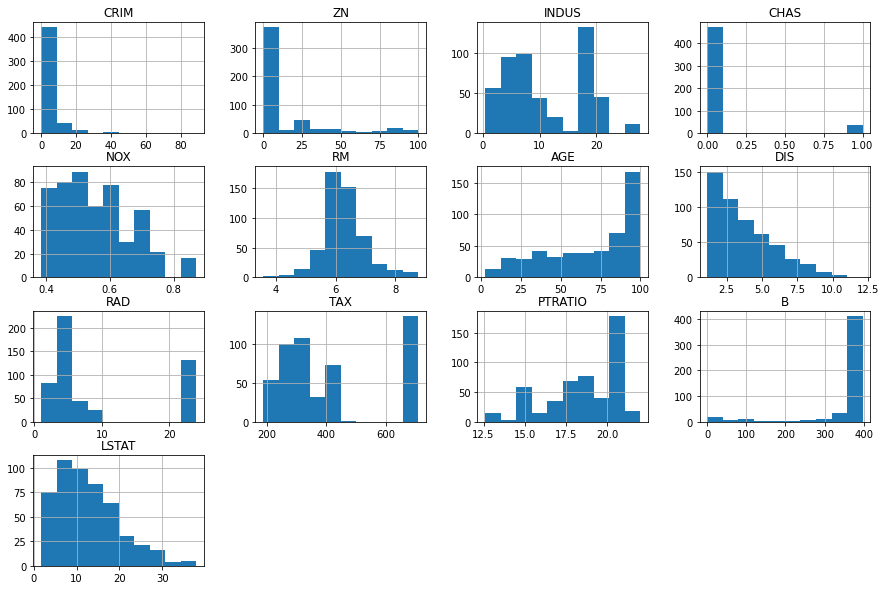

In [105]:
# Feature histogram
df.hist(figsize=(15,10))

### 3.2各个特征与房价的关系散点图

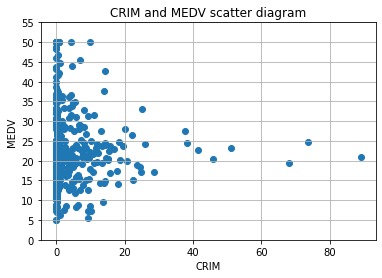

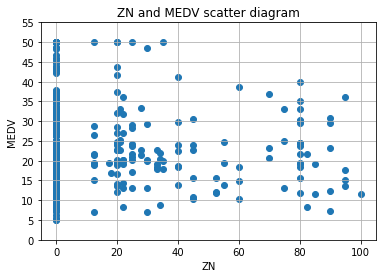

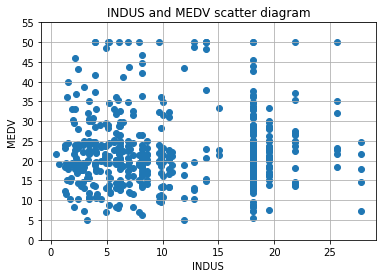

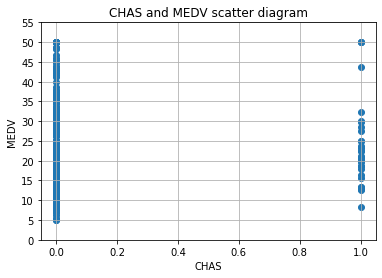

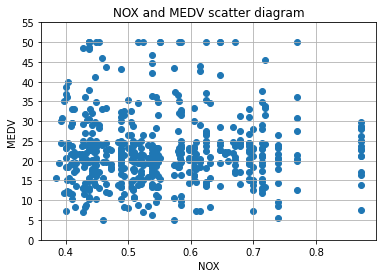

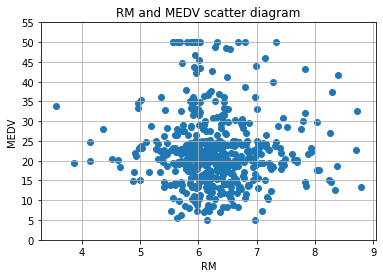

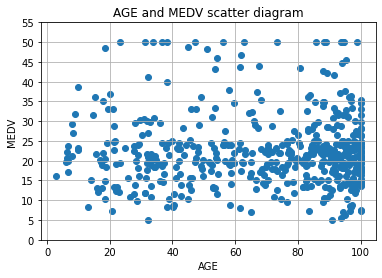

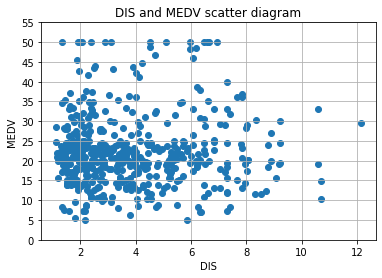

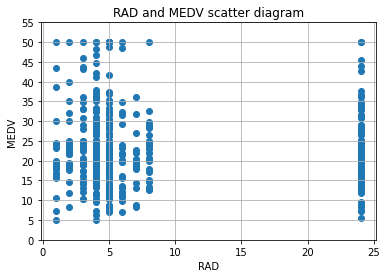

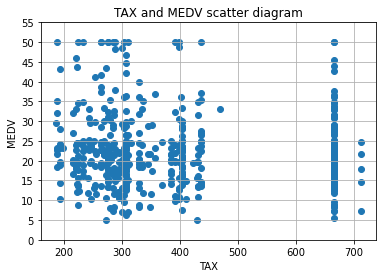

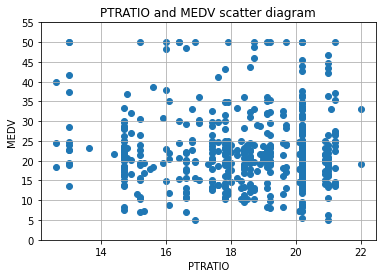

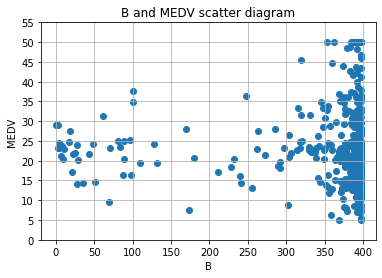

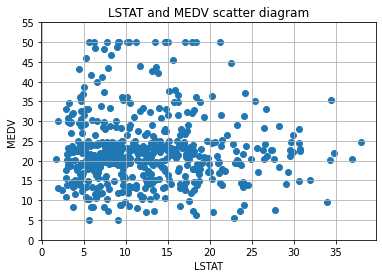

In [106]:
# Draw scatterplots of house prices by each feature
for each in data.feature_names:
    plt.scatter(df[each],y)
    plt.title(each + ' and MEDV scatter diagram')
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

### 3.3热力图

<AxesSubplot:>

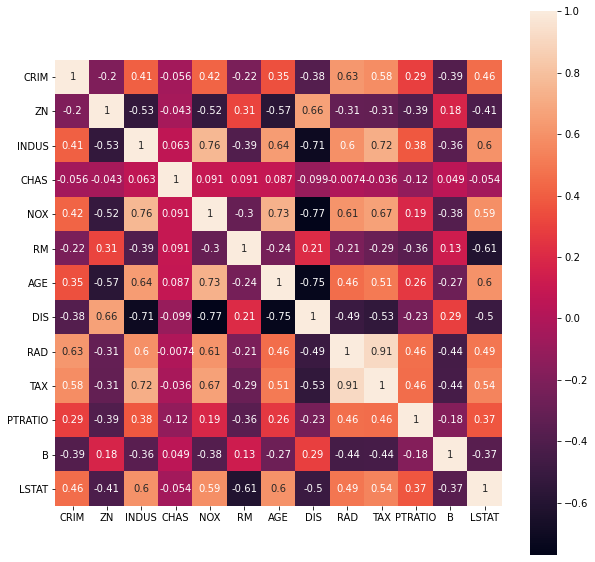

In [107]:
# Plot a heatmap of the relationship between individual features
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)

### 3.4房价分布图

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

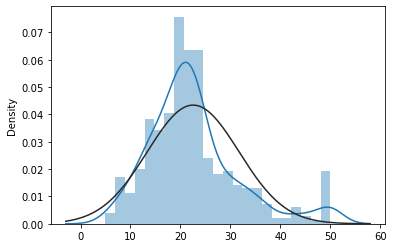

In [108]:
# Draw a house price distribution graph to see if the house price distribution is a normal distribution
sns.distplot(y,fit=stats.norm)

### 3.5概率图

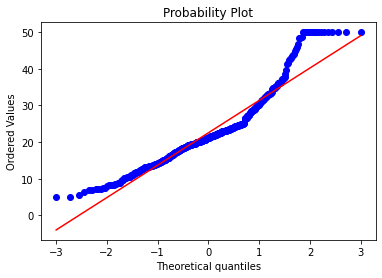

In [109]:
res = stats.probplot(y, plot=plt)

# 4.数据处理

### 4.1对数变换

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

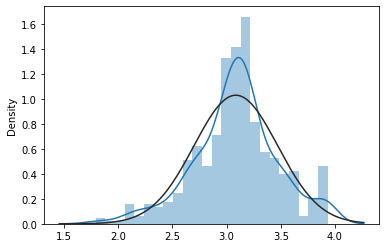

In [110]:
# The distribution of the data does not follow a normal distribution, so a log transformation may be required
y_log = np.log1p(y)
sns.distplot(y_log, fit=stats.norm)

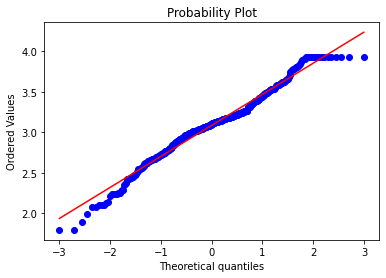

In [111]:
res = stats.probplot(y_log, plot=plt)

In [112]:
# Test R^2 score of the model before and after log transformation on a ridge regression model
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model before log transforamtion:{:,.10f}".format(test_reg_score))
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
test_reg_log = Ridge()
test_reg_log.fit(X_train, y_train_log)
test_reg_y_predict_log = test_reg_log.predict(X_test)
test_reg_score_log = r2_score(y_test_log, test_reg_y_predict_log)
print ("R^2 score of the test model after log transforamtion:{:,.10f}".format(test_reg_score_log))

R^2 score of the test model before log transforamtion:0.6816407322
R^2 score of the test model after log transforamtion:0.7219696773


In [113]:
# test2_reg = SVR()
# test2_reg.fit(X_train, y_train)
# test2_reg_y_predict = test2_reg.predict(X_test)
# test2_reg_score = r2_score(y_test, test2_reg_y_predict)
# print ("R^2 score of the test model2 before log transforamtion:{:,.10f}".format(test2_reg_score))

# test2_reg_log = SVR()
# test2_reg_log.fit(X_train, y_train_log)
# test2_reg_y_predict_log = test2_reg_log.predict(X_test)
# test2_reg_score_log = r2_score(y_test_log, test2_reg_y_predict_log)
# print ("R^2 score of the test model2 after log transforamtion:{:,.10f}".format(test2_reg_score_log))

### 4.2缺失值处理

In [114]:
# Check for missing values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### 4.3删除一些特征

In [115]:
# View the relationship between the features and MEDV
y_train_df = pd.DataFrame(y_train, columns = ['MEDV'])
y_test_df = pd.DataFrame(y_test, columns = ['MEDV'])
y_df = pd.concat([y_train_df,y_test_df],ignore_index=True,sort=False)
xy_df = pd.concat([df,y_df],axis=1)
# xy_df.to_csv('boston.csv')
xy_df.corr()['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

<AxesSubplot:>

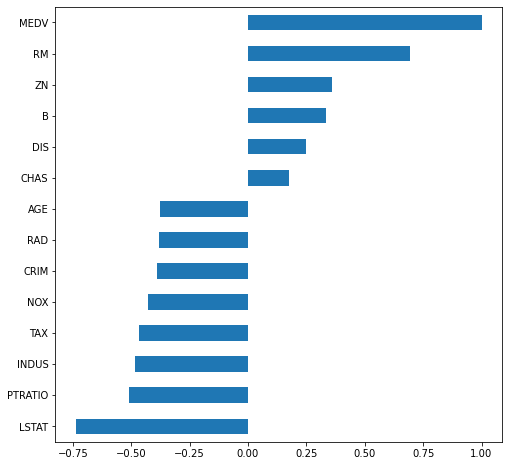

In [116]:
# Visualize the relationship between features and MEDV through graphs
corr = xy_df.corr()['MEDV']
corr_plot = corr.copy()
corr_plot.sort_values(ascending=True,inplace=True)
corr_plot.plot.barh(figsize=(8,8))

In [117]:
feature_names = load_boston().feature_names
score = {}
# Test R^2 score of the model before removing any features on a ridge regression model
print("Before removing any features:")
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model:{:,.10f}".format(test_reg_score))
score['Original'] = test_reg_score
# Test R^2 score of the model after removing each feature on a ridge regression model
for i in range(13):
    X_train_d = np.delete(X_train,i,axis=1)
    X_test_d = np.delete(X_test,i,axis=1)
    test_reg_d = Ridge()
    test_reg_d.fit(X_train_d, y_train)
    test_reg_y_predict_d = test_reg_d.predict(X_test_d)
    test_reg_score_d = r2_score(y_test, test_reg_y_predict_d)
    print ("After removing %s: "%(feature_names[i]))
    print ("R^2 score of the test model:{:,.10f}".format(test_reg_score_d))
    score[feature_names[i]] = test_reg_score_d

Before removing any features:
R^2 score of the test model:0.6816407322
After removing CRIM: 
R^2 score of the test model:0.6856170444
After removing ZN: 
R^2 score of the test model:0.6664230707
After removing INDUS: 
R^2 score of the test model:0.6815856576
After removing CHAS: 
R^2 score of the test model:0.6826652669
After removing NOX: 
R^2 score of the test model:0.6629871769
After removing RM: 
R^2 score of the test model:0.6413203629
After removing AGE: 
R^2 score of the test model:0.6818477898
After removing DIS: 
R^2 score of the test model:0.6246593144
After removing RAD: 
R^2 score of the test model:0.6574795642
After removing TAX: 
R^2 score of the test model:0.6681304224
After removing PTRATIO: 
R^2 score of the test model:0.6492138623
After removing B: 
R^2 score of the test model:0.6674864669
After removing LSTAT: 
R^2 score of the test model:0.6093221410


<AxesSubplot:>

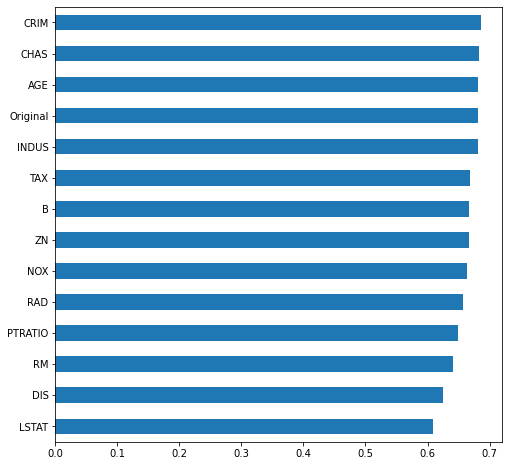

In [118]:
# Visualize the results of the R^2 score without removing any featur and after removing each feature
score = pd.Series(score)
score_plot = score.copy()
score_plot.sort_values(ascending=True,inplace=True)
score_plot.plot.barh(figsize=(8,8))

# 5.特征工程

### 特征偏度

In [119]:
# from scipy.stats import norm,skew

# numeric_feats = df.select_dtypes(exclude=['object']).columns
# skewed_feats = df[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
# print('\n Skew in numerical features:\n')
# skewness = pd.DataFrame({'Skew':skewed_feats})
# skewness.head(10)

### 用box-cox变换来处理

In [120]:
# skewness = skewness[abs(skewness)>0.75]
# print('{}skewed features'.format(skewness.shape[0]))

# skewed_feats = skewness.index
# lam = 0.15
# for feat in skewed_feats:
#     df[feat] = boxcox1p(df[feat],lam)

### 最后进行one-hot 编码

In [121]:
# df = pd.get_demmies(df)
# print(df.shape)

### 5.1数据增强

In [122]:
split_features = {
    'CRIM':3,
    'ZN':3,
    'INDUS':4,
    'NOX':5,
    'RM':3,
    'AGE':7,
    'DIS':3,
    'RAD':2,
    'TAX':4,
    'PTRATIO':3,
    'B':4,
    'LSTAT':5
}

In [123]:
df_con = df
for f,g in split_features.items():
    new = pd.cut(df[f],g)
    #One-hot encoder
    onehot = pd.get_dummies(new,prefix=f)
    df_con = pd.concat([df_con, onehot], axis=1)
df_con

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,"PTRATIO_(18.867, 22.0]","B_(-0.0766, 99.465]","B_(99.465, 198.61]","B_(198.61, 297.755]","B_(297.755, 396.9]","LSTAT_(1.694, 8.978]","LSTAT_(8.978, 16.226]","LSTAT_(16.226, 23.474]","LSTAT_(23.474, 30.722]","LSTAT_(30.722, 37.97]"
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,...,1,0,0,0,1,1,0,0,0,0
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,...,1,0,0,0,1,1,0,0,0,0
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,...,1,0,0,0,1,0,1,0,0,0
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,...,0,0,0,0,1,1,0,0,0,0
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,...,1,0,0,0,1,0,1,0,0,0
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,...,0,0,0,0,1,1,0,0,0,0
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,...,1,0,0,0,1,0,1,0,0,0
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,...,1,0,0,0,1,0,0,0,0,1


### 5.2标准化

In [124]:
# Data normalization after data augmentation
scaler = StandardScaler()
train_X_len = X_train.shape[0]
train_X = df_con[:train_X_len]
test_X = df_con[train_X_len:]
X_train_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [125]:
# Use PCA to select and reduce the number of features and reduce the dimension to 50
pca = PCA(n_components=50)
X_train_scaled = pca.fit_transform(X_train_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [126]:
# print(X_test[0])
# # X_test=np.append(X_test,[2.818380,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42])
# d=np.array([2.81838e+00,0.00000e+00,1.81000e+01,0.00000e+00,5.32000e-01,5.76200e+00,4.03000e+01,4.09830e+00,2.40000e+01,6.66000e+02,2.02000e+01,3.92920e+02,1.04200e+01])
# X_test0=np.insert(X_test,0,d,axis=0)
# print(X_test0)

# Data normalization without data augmentation
transfer  = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)

# print(X_test0[0])
# X_test0 = transfer.fit_transform(X_test0)
# print(X_test0[0])

# 6.建模对比

## 6.1线性回归模型

### 方法一：线性回归  log

### 无数据增强

In [127]:
# Linear regression module instantiates an object
lin_reg = LinearRegression()
# Fit the training set with the linear regression module
lin_reg.fit(X_train, y_train_log)
# Get the predicted value
lin_reg_y_predict=lin_reg.predict(X_test)
# Get the R^2 score of the trained model
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.6645740822 on test data.


array([3.09991598, 3.1481634 , 3.39441833, 2.78017077, 2.38942475,
       2.78872525, 3.20599756, 3.30852657, 3.33292678, 2.90381834,
       3.22698316, 3.48645081, 2.4996232 , 3.14281915, 3.15817907,
       3.49806443, 2.80770331, 2.93502074, 3.11062508, 2.90180087,
       3.29106004, 3.30274066, 3.0117067 , 3.50575342, 3.0328315 ,
       1.97545823, 3.75334476, 2.93200042, 3.22352151, 3.22703403,
       3.29067698, 3.54054492, 3.2125636 , 3.4185683 , 3.2880477 ,
       3.52324213, 3.29300783, 3.28667084, 2.02866859, 3.40517474,
       3.16344681, 3.28040321, 2.79247261, 2.79686683, 3.00792228,
       3.01616937, 3.18037337, 3.58867585, 3.01729245, 2.94378409,
       2.16117449, 3.40348995, 3.20280071, 3.88253022, 3.35620242,
       2.2232303 , 3.43862253, 3.65642534, 3.37106856, 3.11207782,
       3.20190491, 3.0284252 , 2.85555469, 2.89554645, 3.29552503,
       3.41974236, 3.31862129, 3.29347363, 3.25963995, 3.7155864 ,
       3.40849236, 3.61291919, 3.03199814, 3.34463194, 2.45104

In [128]:
def figure_prediction(y_real, y_predict):
    plt.figure(figsize=(20,5))
    plt.xlabel('id', fontsize=15)
    plt.ylabel('MEDV', fontsize=15)
    plt.plot(np.arange(0,y_real.shape[0]), y_real, c='green', linestyle='--')
    plt.plot(np.arange(0,y_real.shape[0]), y_predict, c='red', linestyle='-.')

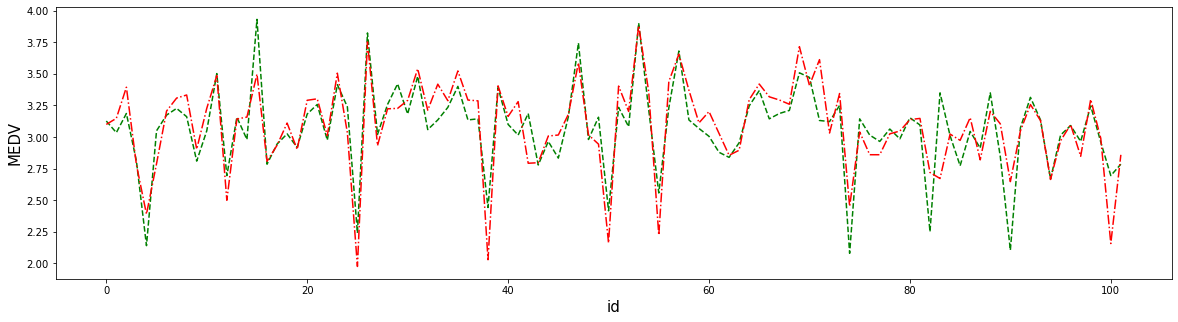

In [129]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lin_reg_y_predict)

### 有数据增强

In [130]:
# Linear regression module instantiates an object
lin_reg = LinearRegression()
# Fit the training set with the linear regression module
lin_reg.fit(X_train_scaled, y_train_log)
# Get the predicted value
lin_reg_y_predict=lin_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.7766367935 on test data.


array([3.15360819, 3.10463095, 3.29758011, 2.89514384, 2.39955273,
       2.86553891, 3.13189563, 3.28455196, 3.1720217 , 2.83205359,
       3.06307767, 3.29463767, 2.65094269, 3.01012273, 3.09405284,
       3.68561837, 2.79601975, 2.94131393, 3.10469752, 2.8700234 ,
       3.24140163, 3.3056183 , 3.10107954, 3.34616234, 3.17373013,
       2.17493781, 3.7237732 , 2.97977416, 3.21476821, 3.14965793,
       3.28873534, 3.42102783, 3.15416994, 3.47858103, 3.33230259,
       3.40347818, 3.16956348, 3.23266088, 2.23937196, 3.30323445,
       3.12029787, 3.14631033, 2.72338444, 2.74837783, 2.98692324,
       2.96905832, 3.13204186, 3.4785953 , 3.02766782, 2.87859078,
       2.39353339, 3.23285801, 3.13888753, 3.7881877 , 3.26607735,
       2.65654475, 3.35410626, 3.6366753 , 3.12866709, 3.09841419,
       3.18828234, 3.12566499, 2.80621509, 3.00279879, 3.18614676,
       3.23107665, 3.20417914, 3.09579048, 3.2203126 , 3.63319155,
       3.36615481, 3.6901459 , 3.01616357, 3.25938498, 2.54626

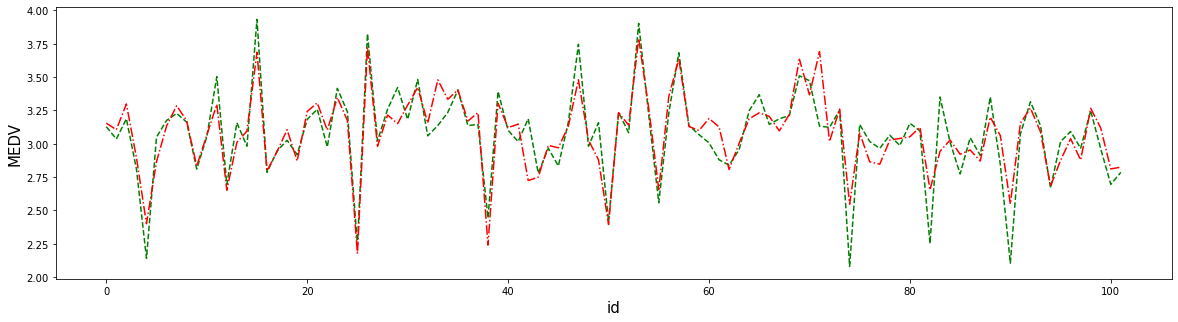

In [131]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lin_reg_y_predict)

### 方法二：随机参数回归 log

### 无数据增强

In [132]:
# The random parameter regression module instantiates an object
sgd_reg = SGDRegressor(max_iter=1000,tol=0.001)#tol=0.001是指的是每次迭代是否损失函数越来越小，如果损失函数的值小于0.001的话就停止迭代
# Fit the training set with the random parameter regression module
sgd_reg.fit(X_train, y_train_log)
# Get the predicted value
sgd_reg_y_predict = sgd_reg.predict(X_test)
# Get the R^2 score of the trained model
sgd_reg_score = r2_score(y_test_log, sgd_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(sgd_reg_score))
sgd_reg_y_predict

R^2 score 0.6363067827 on test data.


array([3.04946846, 3.24687951, 3.35714964, 2.78575306, 2.39034634,
       2.7527175 , 3.19316446, 3.3311203 , 3.30963272, 2.95461613,
       3.19403043, 3.52107192, 2.55327427, 3.14792391, 3.12244233,
       3.44590282, 2.82705118, 2.96850022, 3.04324534, 2.91214239,
       3.28273262, 3.30477207, 3.08683683, 3.51985051, 3.07713806,
       1.98976618, 3.75190884, 2.94713975, 3.19327778, 3.1995206 ,
       3.31403245, 3.52588281, 3.19322842, 3.40473998, 3.30437209,
       3.51515363, 3.2986679 , 3.23544967, 1.99359274, 3.35613058,
       3.20071667, 3.26983453, 2.76665711, 2.74656435, 3.02083305,
       2.95027689, 3.17862364, 3.56830961, 3.04913246, 2.9239366 ,
       2.1273178 , 3.36859337, 3.22548319, 3.84750973, 3.34233051,
       2.14410105, 3.39259366, 3.70720468, 3.40653337, 3.08594489,
       3.22199497, 3.05153953, 2.82958521, 2.91954231, 3.32029091,
       3.42751684, 3.3033172 , 3.29573556, 3.23843772, 3.70634792,
       3.45500972, 3.65595704, 3.081722  , 3.3308291 , 2.58824

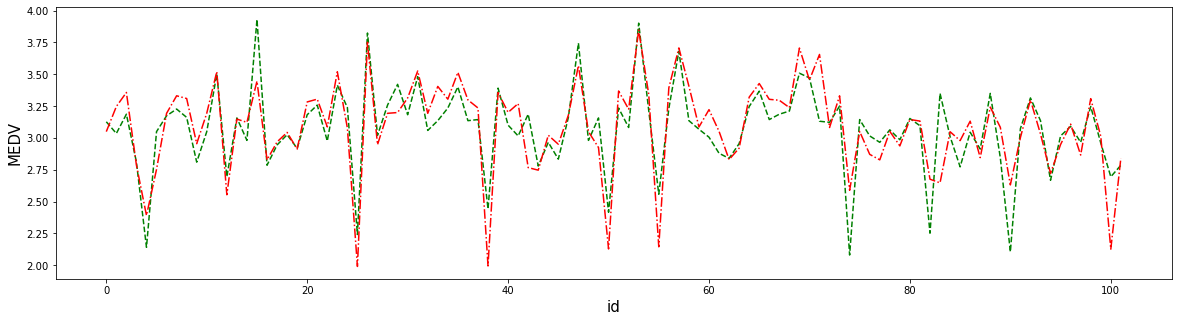

In [133]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, sgd_reg_y_predict)

### 有数据增强

In [134]:
# The random parameter regression module instantiates an object
sgd_reg = SGDRegressor(max_iter=1000,tol=0.001)#tol=0.001是指的是每次迭代是否损失函数越来越小，如果损失函数的值小于0.001的话就停止迭代
# Fit the training set with the random parameter regression module
sgd_reg.fit(X_train_scaled, y_train_log)
# Get the predicted value
sgd_reg_y_predict = sgd_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
sgd_reg_score = r2_score(y_test_log, sgd_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(sgd_reg_score))
sgd_reg_y_predict

R^2 score 0.7577744153 on test data.


array([3.08187386, 3.08505648, 3.22892131, 2.8233465 , 2.49372962,
       3.03194389, 3.09724439, 3.24657418, 3.13972755, 2.98181179,
       3.05689094, 3.49069644, 2.64299523, 3.04212524, 3.03230823,
       3.6095699 , 2.81084317, 3.04128596, 3.06927741, 2.92434906,
       3.20071673, 3.25699178, 3.11354107, 3.38064639, 3.14328904,
       2.36142045, 3.68508787, 2.83441813, 3.24781271, 3.10668289,
       3.22957224, 3.40308629, 3.08992355, 3.1543964 , 3.2443945 ,
       3.45671638, 3.24869096, 3.17205663, 2.43202636, 3.17663408,
       3.06283846, 3.04175195, 2.70384802, 2.71822931, 3.02924888,
       2.94313084, 3.12032903, 3.49069926, 2.90964884, 2.83956273,
       2.48840802, 3.27319254, 3.06235654, 3.69949041, 3.2136384 ,
       2.79047912, 3.3761485 , 3.61918727, 3.26113183, 2.96483081,
       3.07371812, 3.08518233, 2.77782171, 3.00718486, 3.24105327,
       3.27542324, 3.20581849, 3.12825322, 3.25962862, 3.5292584 ,
       3.31191697, 3.67944588, 2.98992958, 3.14792134, 2.59197

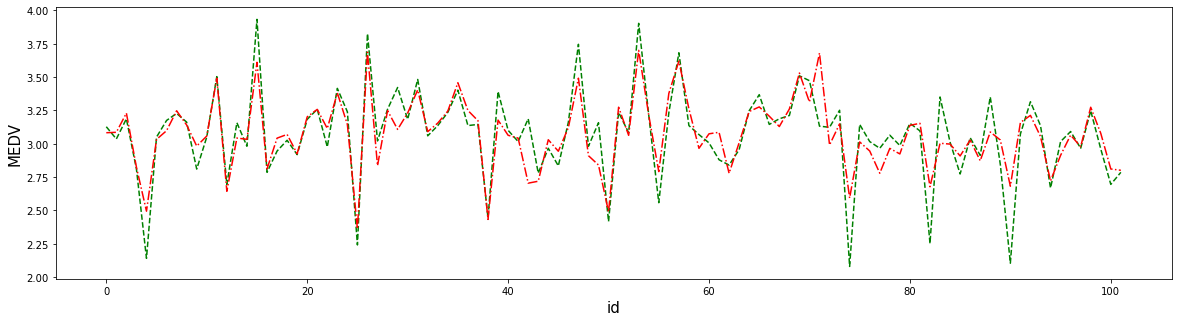

In [135]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, sgd_reg_y_predict)

### 网格搜索

In [136]:
# Use Grid_Search to get the best parameters for the model
def grid_search(model, X, y, params):
    grid = GridSearchCV(estimator = model, param_grid = params, scoring = "r2", cv = 5)
    grid.fit(X,y)
    # Specify the model as the model corresponding to the best parameter
    best_model = grid.best_estimator_
    # View the best parameters and best score
    print("Parameters are {} for the optimal model.".format(grid.best_params_))
    print("Optimal model has best score {:,.10f}.".format(grid.best_score_))
    # View the test score of the model with different parameters
    for i in range(len(grid.cv_results_['mean_test_score'])):
        print(grid.cv_results_['params'][i], "Test score: {:,.10f}".format(grid.cv_results_['mean_test_score'][i]))
    return best_model

### 方法三：岭回归 log

### 无数据增强

In [137]:
# training set
# Get the best parameters for the model 
ridge_reg = grid_search(Ridge(),X_train,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# Use the best model to make predictions
ridge_reg_y_predict = ridge_reg.predict(X_test)
# Get the R^2 score of the trained model
ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 10} for the optimal model.
Optimal model has best score 0.7914954146.
{'alpha': 0.001} Test score: 0.7910541613
{'alpha': 0.01} Test score: 0.7910572027
{'alpha': 0.05} Test score: 0.7910706178
{'alpha': 0.1} Test score: 0.7910871544
{'alpha': 0.5} Test score: 0.7912104852
{'alpha': 1} Test score: 0.7913437575
{'alpha': 10} Test score: 0.7914954146
{'alpha': 20} Test score: 0.7896578728
Optimal model has R^2 score 0.6658199515 on test data.


array([3.07566275, 3.1807755 , 3.37594139, 2.79519732, 2.40752657,
       2.77845082, 3.20089934, 3.30636207, 3.3187472 , 2.93511186,
       3.21432661, 3.49209372, 2.53689804, 3.14258567, 3.1488082 ,
       3.47280361, 2.82497434, 2.94857145, 3.08255939, 2.91384167,
       3.28553903, 3.30002395, 3.04666167, 3.50022677, 3.04745763,
       2.00801583, 3.74103901, 2.94046661, 3.20720079, 3.21610485,
       3.30010681, 3.5233538 , 3.20361035, 3.40538123, 3.29108097,
       3.51491996, 3.29403173, 3.27164627, 2.04034423, 3.38120738,
       3.17291648, 3.27225416, 2.79014206, 2.78646756, 3.02044364,
       3.00192461, 3.17352014, 3.56786625, 3.02877934, 2.93919677,
       2.16918034, 3.38515098, 3.20205145, 3.85499147, 3.33887393,
       2.21266488, 3.41108588, 3.66447441, 3.37844636, 3.10922431,
       3.20525904, 3.03853523, 2.85361413, 2.91839515, 3.30746357,
       3.41609375, 3.30768313, 3.28908018, 3.24527863, 3.70021746,
       3.42203246, 3.62368712, 3.04919282, 3.33516093, 2.50323

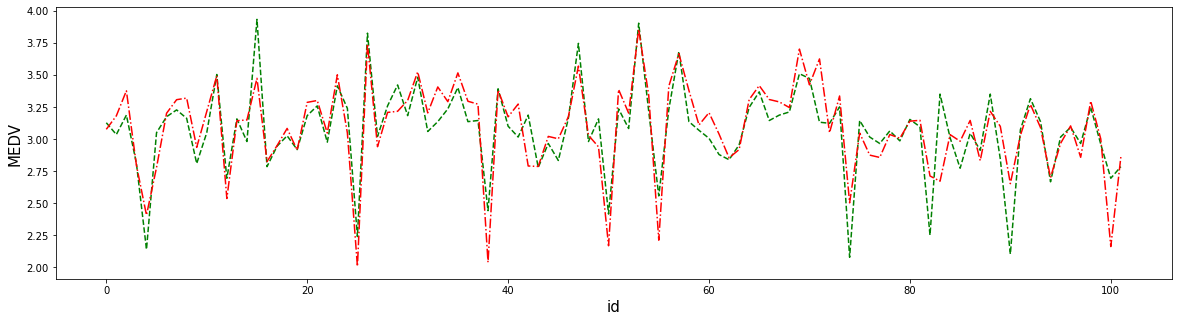

In [138]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ridge_reg_y_predict)

### 有数据增强

In [139]:
# training set
# Get the best parameters for the model 
ridge_reg = grid_search(Ridge(),X_train_scaled,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# Use the best model to make predictions
ridge_reg_y_predict = ridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 1} for the optimal model.
Optimal model has best score 0.8291978390.
{'alpha': 0.001} Test score: 0.8281045342
{'alpha': 0.01} Test score: 0.8281320928
{'alpha': 0.05} Test score: 0.8282467159
{'alpha': 0.1} Test score: 0.8283736607
{'alpha': 0.5} Test score: 0.8289648596
{'alpha': 1} Test score: 0.8291978390
{'alpha': 10} Test score: 0.8256518358
{'alpha': 20} Test score: 0.8213904289
Optimal model has R^2 score 0.7923795937 on test data.


array([3.18738542, 3.11398647, 3.25422154, 2.9543623 , 2.41221131,
       2.90696826, 3.15505555, 3.24400517, 3.21728173, 2.83979615,
       3.06953946, 3.38269799, 2.69575019, 3.03268846, 3.12140688,
       3.67711715, 2.78170691, 2.94863418, 3.12825847, 2.84605035,
       3.22225168, 3.27894384, 3.10775262, 3.39540555, 3.12555558,
       2.25657947, 3.70154625, 2.94512424, 3.24922839, 3.1843927 ,
       3.30027322, 3.46720991, 3.13896264, 3.3585579 , 3.2918416 ,
       3.42924163, 3.18945567, 3.18512376, 2.18088857, 3.25629174,
       3.08289452, 3.1407004 , 2.70195688, 2.74653859, 2.98022835,
       2.93874022, 3.16697891, 3.47183076, 2.9918676 , 2.87106927,
       2.32783283, 3.25116035, 3.11277078, 3.79886501, 3.22004033,
       2.5978956 , 3.35505097, 3.59689645, 3.18432349, 3.03698465,
       3.1435208 , 3.04903396, 2.80077214, 3.02057599, 3.23351213,
       3.24964799, 3.20855597, 3.16332422, 3.22833478, 3.5861072 ,
       3.38144368, 3.63699327, 3.00734602, 3.23401891, 2.57360

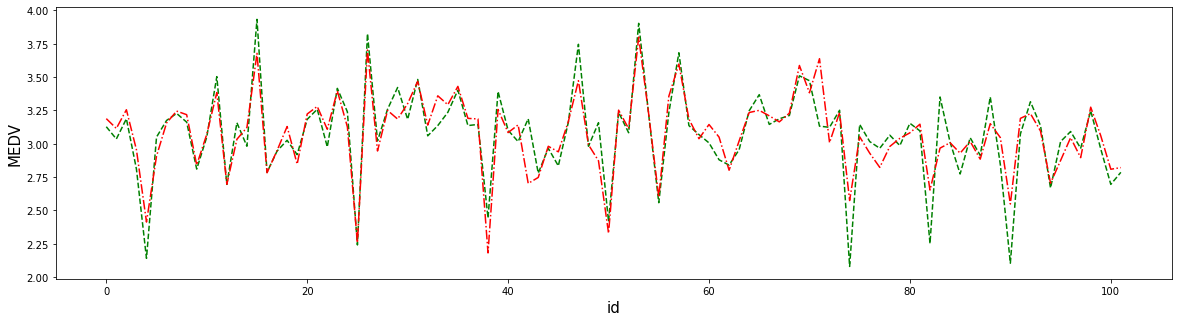

In [140]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ridge_reg_y_predict)

In [141]:
# testing set
ridge_alpha = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]
for i in ridge_alpha:
    # The ridge regression module instantiates an object
    ridge_reg = Ridge(alpha=i)#(alpha表示正则的程度）
    # Fit the training set with the ridge regression module
    ridge_reg.fit(X_train, y_train_log)
    # Model evaluation
    ridge_reg_y_predict = ridge_reg.predict(X_test)
    ridge_reg_score = r2_score(y_test_log, ridge_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(ridge_reg_score))
#     print("预测值为:\n", ridge_reg_y_predict)
#     print("模型中的系数为:\n", ridge_reg.coef_)
#     print("模型中的偏置为:\n", ridge_reg.intercept_)

alpha:0.001    R^2 score:0.6645744203
alpha:0.01    R^2 score:0.6645774595
alpha:0.05    R^2 score:0.6645908940
alpha:0.1    R^2 score:0.6646075194
alpha:0.5    R^2 score:0.6647340464
alpha:1    R^2 score:0.6648770429
alpha:10    R^2 score:0.6658199515
alpha:20    R^2 score:0.6655517586


### 模型评估 MSE（均方误差，越小越好）

In [142]:
# 计算均方误差,越小越好
ridge_reg_MSE = mean_squared_error(y_true=y_test_log, y_pred=ridge_reg_y_predict)
ridge_reg_MSE

0.0370980484097857

### 方法四：贝叶斯岭回归 log

### 无数据增强

In [143]:
# training set
# Get the best parameters for the model
bridge_reg = grid_search(BayesianRidge(),X_train,y_train_log,{})
# Use the best model to make predictions
bridge_reg_y_predict = bridge_reg.predict(X_test)
# Get the R^2 score of the trained model
bridge_score = r2_score(y_test_log, bridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(bridge_score))
bridge_reg_y_predict

Parameters are {} for the optimal model.
Optimal model has best score 0.7916508857.
{} Test score: 0.7916508857
Optimal model has R^2 score 0.6655393405 on test data.


array([3.08740929, 3.16632297, 3.38435922, 2.78788243, 2.39845483,
       2.78332793, 3.20307916, 3.30740909, 3.32596421, 2.92029569,
       3.22000219, 3.48940057, 2.51846486, 3.1425701 , 3.15276936,
       3.48585946, 2.81638139, 2.94232706, 3.09615341, 2.90789311,
       3.28817358, 3.30132265, 3.03017335, 3.50343871, 3.04093049,
       1.99156299, 3.74724772, 2.93693768, 3.21530988, 3.22106115,
       3.29554852, 3.53183721, 3.20800877, 3.4116116 , 3.28943793,
       3.51917539, 3.29380177, 3.27819283, 2.03405462, 3.39226301,
       3.16921247, 3.27623855, 2.79113082, 2.79139805, 3.0143199 ,
       3.00781399, 3.17656949, 3.57843457, 3.02391092, 2.94077626,
       2.16466057, 3.39369867, 3.20289099, 3.86794385, 3.34679633,
       2.21736092, 3.42480183, 3.66143747, 3.3751857 , 3.11010165,
       3.20455182, 3.03411531, 2.85444223, 2.90699491, 3.30176767,
       3.41795933, 3.31308428, 3.29147053, 3.25242757, 3.70788415,
       3.41602206, 3.61932055, 3.04154788, 3.33917119, 2.47983

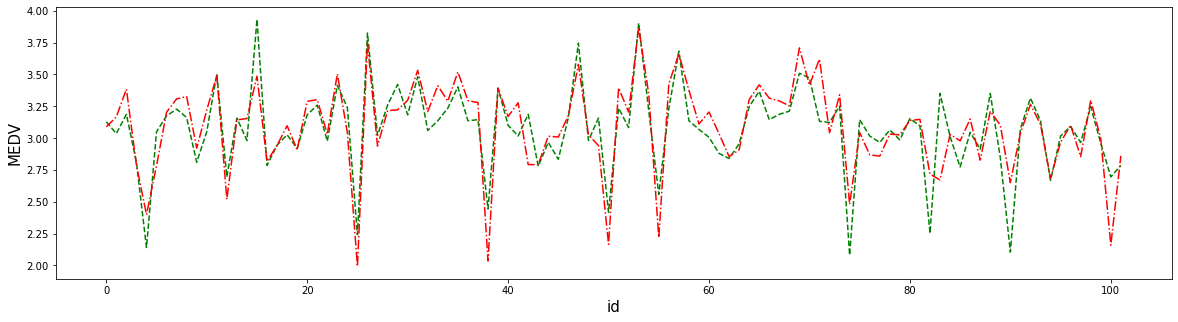

In [144]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, bridge_reg_y_predict)

### 有数据增强

In [145]:
# training set
# Get the best parameters for the model
bridge_reg = grid_search(BayesianRidge(),X_train_scaled,y_train_log,{})
# Use the best model to make predictions
bridge_reg_y_predict = bridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
bridge_score = r2_score(y_test_log, bridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(bridge_score))
bridge_reg_y_predict

Parameters are {} for the optimal model.
Optimal model has best score 0.8245597117.
{} Test score: 0.8245597117
Optimal model has R^2 score 0.7883048032 on test data.


array([3.14137185, 3.1249874 , 3.26823722, 2.88104479, 2.42231048,
       2.94959248, 3.1353962 , 3.25676253, 3.19157356, 2.88311371,
       3.08655606, 3.49303981, 2.66119093, 3.06279576, 3.08820809,
       3.61646417, 2.80467719, 2.98950726, 3.10022913, 2.89160432,
       3.21204997, 3.2659698 , 3.14635188, 3.40134663, 3.11539544,
       2.26814399, 3.69920996, 2.88645716, 3.23629674, 3.14741955,
       3.28931722, 3.44554705, 3.12267089, 3.25528747, 3.27252094,
       3.44305115, 3.23155779, 3.19100645, 2.25843406, 3.21732211,
       3.07466536, 3.11704349, 2.69014697, 2.71712315, 3.00943381,
       2.95485827, 3.15532089, 3.47364266, 2.95121926, 2.87099204,
       2.37382344, 3.2833993 , 3.10275451, 3.7737289 , 3.23441477,
       2.64849885, 3.35939994, 3.62973897, 3.26965731, 3.01229294,
       3.10772657, 3.04990374, 2.77671852, 3.04391508, 3.27835628,
       3.28781274, 3.22503254, 3.16610185, 3.23090774, 3.57266615,
       3.36154089, 3.63199159, 2.99587723, 3.21763254, 2.56321

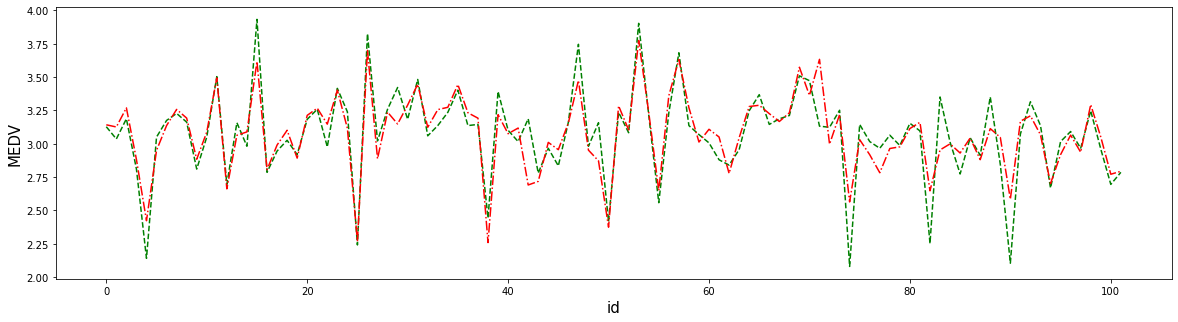

In [146]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, bridge_reg_y_predict)

In [147]:
# testing set
# The Bayesian Ridge Regression module instantiates an object
bridge_reg = BayesianRidge()
# Fit the training set with the Bayesian Ridge Regression module
bridge_reg.fit(X_train, y_train_log)
# Model evaluation
bridge_reg_y_predict = bridge_reg.predict(X_test)
bridge_reg_score = r2_score(y_test_log, bridge_reg_y_predict)
print ("R^2 score:{:,.10f}".format(bridge_reg_score))

R^2 score:0.6655393405


### 方法五：Lasso回归 log

### 无数据增强

In [148]:
# training set
# Get the best parameters for the model
lasso_reg = grid_search(Lasso(),X_train,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# Use the best model to make predictions
lasso_reg_y_predict = lasso_reg.predict(X_test)
# Get the R^2 score of the trained model
lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.7912468200.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.7912468200
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.7864386868
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7766929808
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7597821061
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7499404399
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7366029669
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7230197826
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6306112776
Optimal model has R^2 score 0.6650999820 on test data.


array([3.08964077, 3.17517229, 3.38220658, 2.79241257, 2.3981984 ,
       2.78479095, 3.20264754, 3.31034188, 3.33082498, 2.92509109,
       3.2170205 , 3.48453283, 2.51732303, 3.14476315, 3.15538987,
       3.48674055, 2.81387482, 2.93745919, 3.09334407, 2.9080596 ,
       3.29092053, 3.30517897, 3.03298884, 3.51071839, 3.04611987,
       1.99080668, 3.74633716, 2.93724175, 3.21558255, 3.22244585,
       3.29292068, 3.53875733, 3.20959423, 3.4100388 , 3.29209344,
       3.51965873, 3.29398985, 3.27625826, 2.03311022, 3.3885448 ,
       3.17227139, 3.27403977, 2.79082322, 2.79152784, 3.01313087,
       3.00259626, 3.17923097, 3.57687375, 3.02360424, 2.93734869,
       2.16192755, 3.39253955, 3.2039073 , 3.86077426, 3.34668352,
       2.21907439, 3.42453573, 3.66238908, 3.37465001, 3.10723143,
       3.20797115, 3.0362306 , 2.85361226, 2.90672907, 3.30006939,
       3.41954736, 3.31630418, 3.29689149, 3.25068727, 3.7065741 ,
       3.41828337, 3.6173018 , 3.04505799, 3.33616093, 2.47711

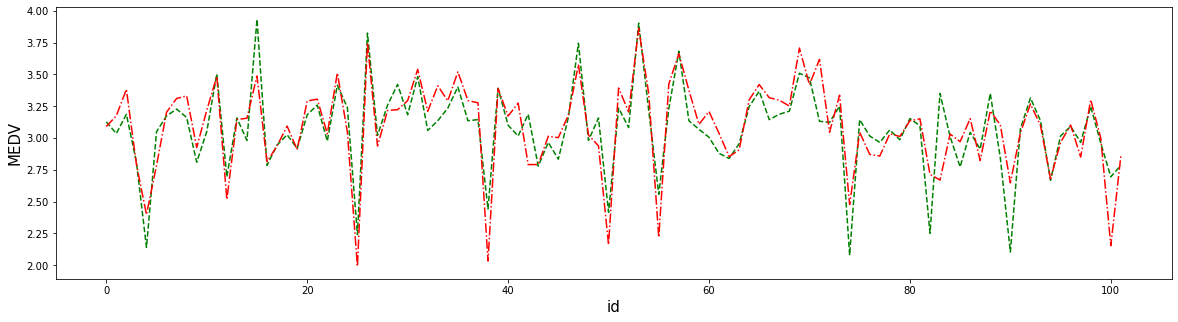

In [149]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lasso_reg_y_predict)

### 有数据增强

In [150]:
# training set
# Get the best parameters for the model
lasso_reg = grid_search(Lasso(),X_train_scaled,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# Use the best model to make predictions
lasso_reg_y_predict = lasso_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.8326263099.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.8326263099
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.8176017782
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7916897118
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7707489534
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7505551728
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7361717555
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7239874882
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6579232582
Optimal model has R^2 score 0.7908607225 on test data.


array([3.19529066, 3.13347253, 3.27578049, 2.96249927, 2.41530114,
       2.91942521, 3.15856687, 3.2612196 , 3.22876661, 2.86595257,
       3.09347385, 3.41750332, 2.71121597, 3.05197287, 3.12426549,
       3.6392239 , 2.80378763, 2.96114954, 3.1419796 , 2.85748343,
       3.22147175, 3.27253381, 3.12810125, 3.40995539, 3.10189211,
       2.2954134 , 3.7018321 , 2.93224393, 3.24003591, 3.15443591,
       3.28129932, 3.46333809, 3.14020777, 3.32898557, 3.27838018,
       3.41792545, 3.18954479, 3.19458975, 2.20506873, 3.23533038,
       3.09075056, 3.14367469, 2.70247369, 2.74971034, 2.98348422,
       2.95492378, 3.15341725, 3.45482921, 2.99030399, 2.87284723,
       2.32968973, 3.25044687, 3.10703696, 3.80039558, 3.2276761 ,
       2.60999324, 3.33974496, 3.60938426, 3.21648137, 3.01817859,
       3.13358744, 3.02965836, 2.80342697, 3.01052617, 3.2670358 ,
       3.27764107, 3.20281247, 3.1926032 , 3.23334484, 3.5845338 ,
       3.34823802, 3.60454218, 3.00089881, 3.23650883, 2.55666

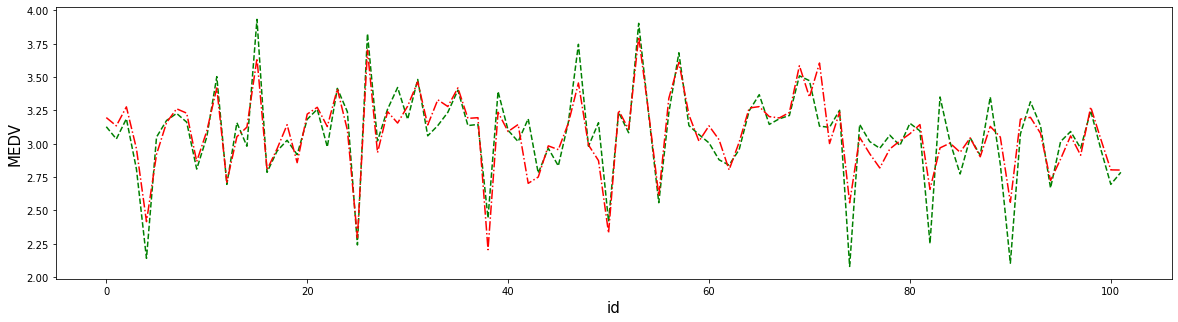

In [151]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, lasso_reg_y_predict)

In [152]:
# testing set
lasso_alpha = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
for i in lasso_alpha:
    # The Lasso regression module instantiates an object
    lasso_reg = Lasso(alpha=i, max_iter=1000)#(alpha表示正则的程度）
    # Fit the training set with the Lasso regression module
    lasso_reg.fit(X_train, y_train_log)
   # Model evaluation
    lasso_reg_y_predict = lasso_reg.predict(X_test)
    lasso_reg_score = r2_score(y_test_log, lasso_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(lasso_reg_score))

alpha:0.001    R^2 score:0.6650999820
alpha:0.005    R^2 score:0.6546190310
alpha:0.01    R^2 score:0.6417697622
alpha:0.02    R^2 score:0.6328493424
alpha:0.03    R^2 score:0.6415675272
alpha:0.04    R^2 score:0.6460503059
alpha:0.05    R^2 score:0.6492738236
alpha:0.1    R^2 score:0.6336269406


### 方法六: ElasticNet回归 log

### 无数据增强

In [153]:
# training set
# Get the best parameters for the model
en_reg = grid_search(ElasticNet(), X_train, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# Use the best model to make predictions
en_reg_y_predict = en_reg.predict(X_test)
# Get the R^2 score of the trained model
en_score = r2_score(y_test_log, en_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.7916181036.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7911656427
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7911517675
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7911299549
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7911892188
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7914480571
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7914652171
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7910024757
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7897407637
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7916181036
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7902122248
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7860937008


array([3.08074341, 3.18676406, 3.37554243, 2.79783265, 2.40489059,
       2.78100209, 3.20082073, 3.30956821, 3.3254179 , 2.93643662,
       3.21247009, 3.48670967, 2.53106509, 3.14461419, 3.15194114,
       3.47739188, 2.82024303, 2.94255896, 3.08315087, 2.9124471 ,
       3.28886392, 3.30413509, 3.04565409, 3.50848071, 3.05127257,
       2.00277685, 3.74193394, 2.94019169, 3.20963909, 3.21839263,
       3.29642008, 3.53232377, 3.20625867, 3.405273  , 3.29321507,
       3.51656203, 3.29437513, 3.27089158, 2.03733896, 3.3799811 ,
       3.17555947, 3.27101042, 2.78998787, 2.78769443, 3.01775092,
       2.99755586, 3.17671249, 3.56935149, 3.02769854, 2.93579796,
       2.16486956, 3.38589108, 3.20359557, 3.85091796, 3.34048688,
       2.21504838, 3.41447043, 3.66530009, 3.37731452, 3.10630967,
       3.20899643, 3.03979593, 2.85294552, 2.91507549, 3.30443113,
       3.41818955, 3.3121872 , 3.29509621, 3.24551468, 3.70093482,
       3.42314491, 3.62135894, 3.05117823, 3.33284194, 2.49609

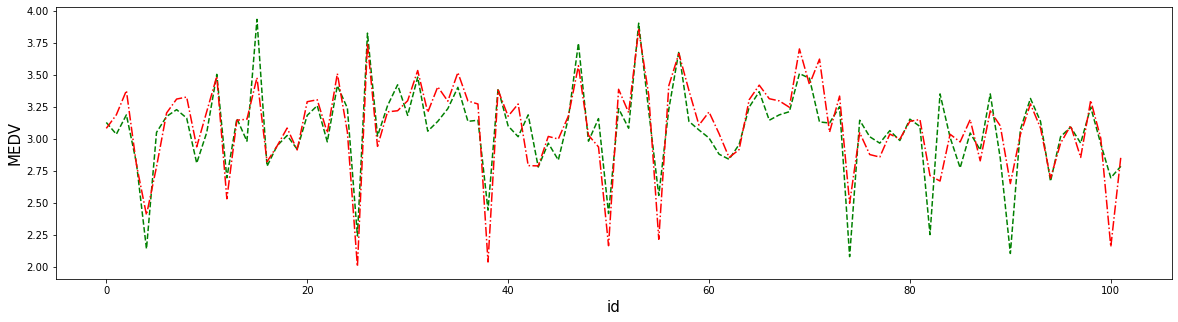

In [154]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, en_reg_y_predict)

### 有数据增强

In [155]:
# training set
# Get the best parameters for the model
en_reg = grid_search(ElasticNet(), X_train_scaled, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# Use the best model to make predictions
en_reg_y_predict = en_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
en_score = r2_score(y_test_log, en_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.8326346106.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8311385911
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8319980154
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8324465886
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.8326346106
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8314390882
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8301808141
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8279887016
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.8246829255
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.8299361495
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.8251842374
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.8161136213

array([3.19804474, 3.12928282, 3.26831622, 2.96279008, 2.41337596,
       2.91126099, 3.15793991, 3.2554376 , 3.22669608, 2.85587285,
       3.0836163 , 3.39816718, 2.70805886, 3.04712764, 3.12671138,
       3.65096835, 2.79823952, 2.95370958, 3.14223669, 2.85293669,
       3.22272951, 3.27594886, 3.11807752, 3.40621236, 3.10607857,
       2.28583252, 3.70019722, 2.93889015, 3.24453194, 3.16627329,
       3.28520533, 3.46465453, 3.14132885, 3.34622786, 3.28448784,
       3.41896526, 3.18676195, 3.19094867, 2.19425049, 3.24399914,
       3.09047992, 3.1462983 , 2.70157121, 2.74852414, 2.98213618,
       2.949543  , 3.15639234, 3.46003501, 2.99346085, 2.872299  ,
       2.32628986, 3.24833089, 3.10803097, 3.80068282, 3.22430464,
       2.60637325, 3.34385385, 3.60443438, 3.1994746 , 3.02597366,
       3.13829859, 3.03260871, 2.80368585, 3.01174638, 3.25319074,
       3.26516622, 3.20307147, 3.18541223, 3.23251999, 3.58661567,
       3.35575615, 3.61137311, 3.00326487, 3.23606036, 2.56450

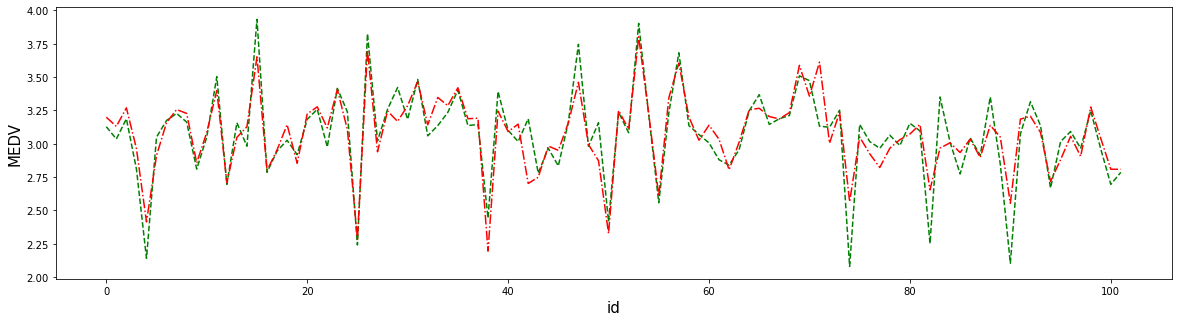

In [156]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, en_reg_y_predict)

In [157]:
# testing set
en_alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 1]
en_l1_ratio = [0.1, 0.3, 0.5, 0.7]
for i in en_alpha:
    for j in en_l1_ratio:
        # ElasticNet regression module instantiates an object
        en_reg = ElasticNet(alpha=i, l1_ratio=j, max_iter=100000)#(alpha表示正则的程度）
        # Fit the training set with the ElasticNet regression module
        en_reg.fit(X_train, y_train_log)
        # Model evaluation
        en_reg_y_predict = en_reg.predict(X_test)
        en_reg_score = r2_score(y_test_log, en_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "l1_ratio:{:,}   ".format(j), "R^2 score:{:,.10f}".format(en_reg_score))

alpha:0.001    l1_ratio:0.1    R^2 score:0.6648157861
alpha:0.001    l1_ratio:0.3    R^2 score:0.6649911366
alpha:0.001    l1_ratio:0.5    R^2 score:0.6651022403
alpha:0.001    l1_ratio:0.7    R^2 score:0.6651494531
alpha:0.005    l1_ratio:0.1    R^2 score:0.6653113952
alpha:0.005    l1_ratio:0.3    R^2 score:0.6645727723
alpha:0.005    l1_ratio:0.5    R^2 score:0.6627851587
alpha:0.005    l1_ratio:0.7    R^2 score:0.6601520515
alpha:0.01    l1_ratio:0.1    R^2 score:0.6651039564
alpha:0.01    l1_ratio:0.3    R^2 score:0.6613411255
alpha:0.01    l1_ratio:0.5    R^2 score:0.6545144325
alpha:0.01    l1_ratio:0.7    R^2 score:0.6445180619
alpha:0.05    l1_ratio:0.1    R^2 score:0.6539764038
alpha:0.05    l1_ratio:0.3    R^2 score:0.6382781036
alpha:0.05    l1_ratio:0.5    R^2 score:0.6404251957
alpha:0.05    l1_ratio:0.7    R^2 score:0.6456137514
alpha:0.1    l1_ratio:0.1    R^2 score:0.6469190967
alpha:0.1    l1_ratio:0.3    R^2 score:0.6466935971
alpha:0.1    l1_ratio:0.5    R^2 score:0

## 6.2集成回归模型

### 方法七：随机森林

### 无数据增强 高

In [158]:
# training set
# Get the best parameters for the model
rf_reg = grid_search(RandomForestRegressor(), X_train, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_depth':[3,5,7], 'max_features':[0.6,0.7,0.8,1]})
# Use the best model to make predictions
rf_reg_y_predict = rf_reg.predict(X_test)
# Get the R^2 score of the trained model
rf_score = r2_score(y_test, rf_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_depth': 7, 'max_features': 0.6, 'n_estimators': 100} for the optimal model.
Optimal model has best score 0.8838835082.
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 5} Test score: 0.7984057613
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 10} Test score: 0.8101970791
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 20} Test score: 0.8106354754
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 50} Test score: 0.8247357583
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 100} Test score: 0.8178037240
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 200} Test score: 0.8197942538
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 5} Test score: 0.7997127877
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 10} Test score: 0.8081983080
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 20} Test score: 0.8045535983
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 50} Test score: 0.8158344736
{'max_depth': 3, 'max_features

array([20.46834831, 22.27513634, 23.69959909, 14.77181278, 12.341482  ,
       16.68696997, 20.33682656, 25.62622262, 21.63866281, 15.63582459,
       20.86767549, 33.19202895, 15.03264045, 20.59854743, 21.86614405,
       38.33087692, 16.01440847, 17.93566865, 20.32044629, 18.85657075,
       24.04737736, 25.20574816, 22.37862971, 28.54938841, 20.54499456,
        8.76209609, 45.36735952, 17.81392128, 23.68505677, 24.60505621,
       25.62935116, 29.01115271, 20.82299801, 25.87738345, 26.44932068,
       27.6423737 , 26.70126558, 24.89864226,  7.11900442, 24.8312865 ,
       20.77503798, 20.83296957, 13.64948786, 11.77985674, 20.8457378 ,
       19.84119041, 20.93038692, 37.11205511, 19.92823845, 19.96527899,
        7.98158591, 27.895123  , 21.49769459, 48.47792619, 22.86520218,
       15.22508626, 25.60617101, 44.54144834, 25.82943711, 21.51969036,
       20.90157671, 20.65631461, 14.86381922, 21.70482894, 24.90569861,
       29.85922431, 22.73491452, 21.11609594, 20.99204586, 32.83

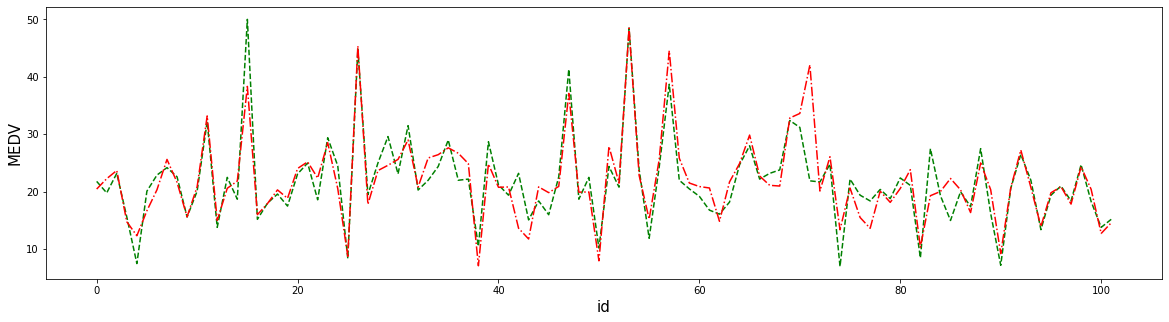

In [159]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, rf_reg_y_predict)

### 有数据增强 低

In [160]:
# training set
# Get the best parameters for the model
rf_reg = grid_search(RandomForestRegressor(), X_train_scaled, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_depth':[3,5,7], 'max_features':[0.6,0.7,0.8,1]})
# Use the best model to make predictions
rf_reg_y_predict = rf_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
rf_score = r2_score(y_test, rf_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_depth': 7, 'max_features': 0.6, 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.7895635005.
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 5} Test score: 0.6421905484
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 10} Test score: 0.6582395928
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 20} Test score: 0.6631775653
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 50} Test score: 0.6943929127
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 100} Test score: 0.6821355313
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 200} Test score: 0.6823706991
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 5} Test score: 0.6207378987
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 10} Test score: 0.6747277781
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 20} Test score: 0.6893056287
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 50} Test score: 0.6729956348
{'max_depth': 3, 'max_features

array([21.19555521, 22.18042226, 24.21894505, 23.65036656, 10.4055404 ,
       19.78693399, 22.33330441, 23.58554095, 23.40766067, 19.7279625 ,
       21.68798551, 32.08358514, 22.94052515, 21.8013686 , 20.97238852,
       41.66171455, 16.40806813, 18.1361505 , 21.06410126, 20.01881206,
       22.32109192, 23.26057897, 23.42879123, 24.75974888, 20.68623729,
       14.04404901, 43.57781833, 23.54148394, 21.05295969, 26.32946395,
       26.60988404, 25.66405426, 20.87901801, 26.54579818, 24.21223118,
       28.88953326, 22.24641875, 23.85021009, 10.02012065, 23.07830838,
       20.76058243, 23.76742681, 19.01768355, 13.45927202, 19.22009025,
       21.21209757, 21.72886683, 25.58083355, 23.46281676, 20.13935217,
       10.35360572, 25.70054125, 22.7391386 , 46.5037591 , 22.17576872,
       14.58955717, 25.45746175, 40.04069597, 28.30251801, 21.89772976,
       21.16239958, 19.87482768, 14.21493199, 23.30734404, 24.37530637,
       25.66557552, 23.37923925, 22.2587022 , 21.01235602, 30.49

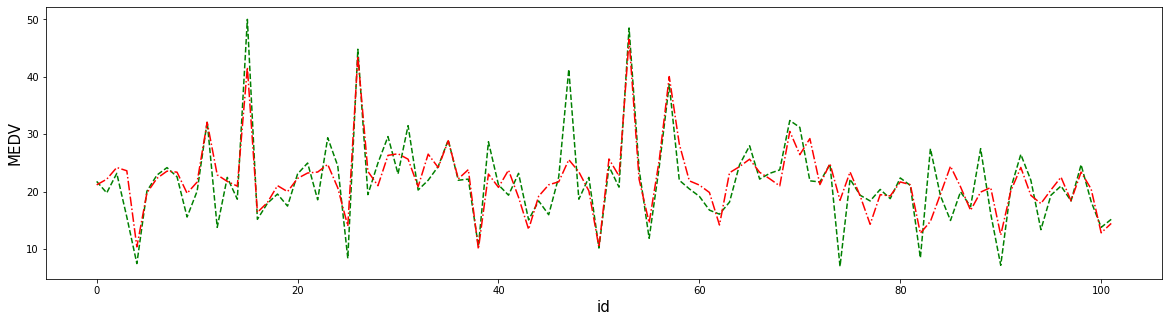

In [161]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, rf_reg_y_predict)

In [162]:
# testing set
rf_n_estimators = [5, 10, 20, 50, 100, 200]
rf_max_depth = [3, 5, 7]
rf_max_features = [0.6, 0.7, 0.8, 1]
for i in rf_n_estimators:
    for j in rf_max_depth:
        for k in rf_max_features:
            # The random forest regression module instantiates an object
            rf_reg = RandomForestRegressor(n_estimators=i, max_depth=j, max_features=k)
            # Fit the training set with the random forest regression module
            rf_reg.fit(X_train, y_train)
            # Model evaluation
            rf_reg_y_predict = rf_reg.predict(X_test)
            rf_reg_score = r2_score(y_test, rf_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "max_depth:{:,}   ".format(j), "max_features:{:,}   ".format(k), "R^2 score:{:,.10f}".format(rf_reg_score))

n_estimators:5    max_depth:3    max_features:0.6    R^2 score:0.6319927824
n_estimators:5    max_depth:3    max_features:0.7    R^2 score:0.7442221831
n_estimators:5    max_depth:3    max_features:0.8    R^2 score:0.6809763802
n_estimators:5    max_depth:3    max_features:1    R^2 score:0.4047592778
n_estimators:5    max_depth:5    max_features:0.6    R^2 score:0.7541654007
n_estimators:5    max_depth:5    max_features:0.7    R^2 score:0.6053102732
n_estimators:5    max_depth:5    max_features:0.8    R^2 score:0.7514693314
n_estimators:5    max_depth:5    max_features:1    R^2 score:0.5368192875
n_estimators:5    max_depth:7    max_features:0.6    R^2 score:0.6550181513
n_estimators:5    max_depth:7    max_features:0.7    R^2 score:0.7185681051
n_estimators:5    max_depth:7    max_features:0.8    R^2 score:0.6773396340
n_estimators:5    max_depth:7    max_features:1    R^2 score:0.5284384161
n_estimators:10    max_depth:3    max_features:0.6    R^2 score:0.6734939724
n_estimators:10  

### 方法八： 极端随机森林回归

### 无数据增强 高

In [195]:
# training set
# Get the best parameters for the model
et_reg = grid_search(ExtraTreesRegressor(), X_train, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# Use the best model to make predictions
et_reg_y_predict = et_reg.predict(X_test)
# Get the R^2 score of the trained model
et_score = r2_score(y_test, et_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 400} for the optimal model.
Optimal model has best score 0.8972918935.
{'max_features': 1, 'n_estimators': 50} Test score: 0.8347593203
{'max_features': 1, 'n_estimators': 100} Test score: 0.8296252471
{'max_features': 1, 'n_estimators': 200} Test score: 0.8318763825
{'max_features': 1, 'n_estimators': 300} Test score: 0.8370733215
{'max_features': 1, 'n_estimators': 400} Test score: 0.8367172844
{'max_features': 2, 'n_estimators': 50} Test score: 0.8549495954
{'max_features': 2, 'n_estimators': 100} Test score: 0.8812057996
{'max_features': 2, 'n_estimators': 200} Test score: 0.8648083939
{'max_features': 2, 'n_estimators': 300} Test score: 0.8690978522
{'max_features': 2, 'n_estimators': 400} Test score: 0.8700126455
{'max_features': 3, 'n_estimators': 50} Test score: 0.8753543707
{'max_features': 3, 'n_estimators': 100} Test score: 0.8812188043
{'max_features': 3, 'n_estimators': 200} Test score: 0.8848117980
{'max_features': 3, 'n_

array([22.036     , 21.91125   , 24.38525   , 15.52475   ,  9.743     ,
       18.19875   , 21.87875   , 24.5695    , 22.827     , 16.88925   ,
       22.18025   , 33.27475   , 15.83275   , 22.14825   , 20.96075   ,
       44.93325   , 16.652375  , 18.17125   , 20.71775   , 17.8175    ,
       24.444     , 25.05525   , 22.77125   , 28.6785    , 21.2695    ,
        9.53325   , 44.89925   , 18.62775   , 22.62825   , 27.3095    ,
       26.80175   , 32.4915    , 20.97925   , 26.915     , 26.5845    ,
       28.33625   , 23.852     , 24.466     ,  7.0645    , 24.7925    ,
       21.27625   , 22.51575   , 14.669     , 13.07875   , 19.95975   ,
       19.9085    , 22.92475   , 39.839     , 20.167     , 20.262     ,
        8.2385    , 27.442     , 21.51475   , 47.8585    , 24.27      ,
       12.44775   , 26.86575   , 43.0325    , 26.3035    , 22.27325   ,
       21.0775    , 20.09775   , 15.43766667, 21.224     , 27.68675   ,
       29.11      , 24.34775   , 23.307     , 22.01625   , 33.52

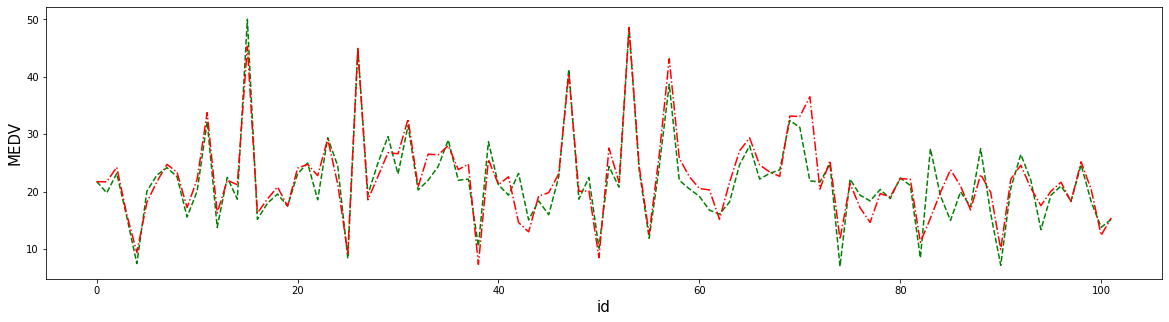

In [164]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, et_reg_y_predict)

### 有数据增强 低

In [165]:
# training set
# Get the best parameters for the model
et_reg = grid_search(ExtraTreesRegressor(), X_train_scaled, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# Use the best model to make predictions
et_reg_y_predict = et_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
et_score = r2_score(y_test, et_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 400} for the optimal model.
Optimal model has best score 0.7415293452.
{'max_features': 1, 'n_estimators': 50} Test score: 0.5782783974
{'max_features': 1, 'n_estimators': 100} Test score: 0.6020421286
{'max_features': 1, 'n_estimators': 200} Test score: 0.6061264505
{'max_features': 1, 'n_estimators': 300} Test score: 0.5970571083
{'max_features': 1, 'n_estimators': 400} Test score: 0.6055912933
{'max_features': 2, 'n_estimators': 50} Test score: 0.6639172325
{'max_features': 2, 'n_estimators': 100} Test score: 0.6583725457
{'max_features': 2, 'n_estimators': 200} Test score: 0.6750781368
{'max_features': 2, 'n_estimators': 300} Test score: 0.6729959918
{'max_features': 2, 'n_estimators': 400} Test score: 0.6715985636
{'max_features': 3, 'n_estimators': 50} Test score: 0.7065575321
{'max_features': 3, 'n_estimators': 100} Test score: 0.7089978226
{'max_features': 3, 'n_estimators': 200} Test score: 0.7131234750
{'max_features': 3, 'n_

array([23.417  , 23.0275 , 25.484  , 18.94075, 11.031  , 20.78825,
       22.32   , 23.612  , 25.399  , 19.793  , 21.50925, 29.84575,
       18.221  , 23.49425, 20.1455 , 46.45175, 15.44125, 17.2685 ,
       23.43675, 18.608  , 23.17775, 24.164  , 24.63375, 27.16425,
       22.8545 , 17.239  , 42.04025, 19.87125, 20.3585 , 30.194  ,
       26.48   , 28.364  , 21.711  , 26.42925, 24.756  , 26.70175,
       23.508  , 23.897  , 11.5575 , 23.28125, 20.17625, 25.353  ,
       18.52125, 13.25   , 19.08175, 22.02875, 23.67375, 30.088  ,
       20.546  , 20.05025, 12.90375, 26.02475, 22.663  , 46.8645 ,
       24.31925, 18.203  , 27.547  , 33.48575, 26.41125, 20.82125,
       19.84625, 19.4525 , 14.39325, 22.09   , 24.59725, 25.44375,
       25.2835 , 24.67975, 19.7965 , 28.09   , 26.6795 , 28.1255 ,
       22.47425, 23.702  , 16.4035 , 24.4255 , 19.97   , 14.0535 ,
       20.6995 , 20.32075, 22.189  , 21.1175 , 12.38525, 18.52475,
       19.977  , 25.619  , 20.382  , 17.24975, 21.97975, 20.8 

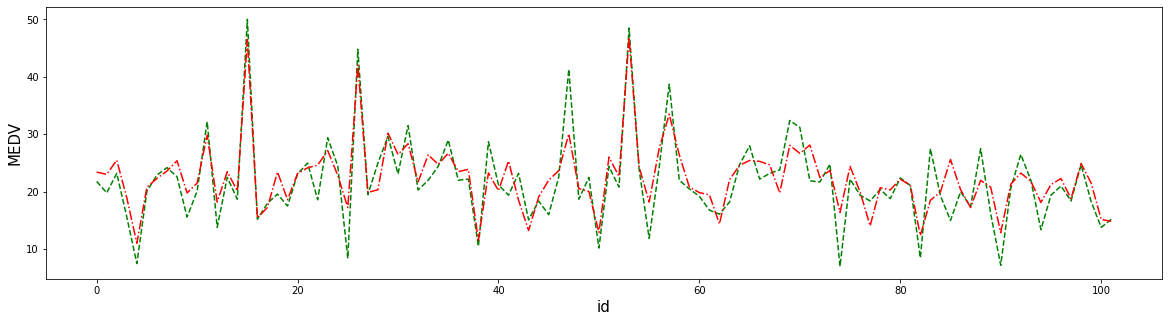

In [166]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, et_reg_y_predict)

In [167]:
# testing set
et_n_estimators = [50, 100, 200, 300, 400]
et_max_features = [1,2,3,4]
for i in rf_n_estimators:
    for j in rf_max_features:
        # The extra trees regression module instantiates an object
        et_reg = ExtraTreesRegressor(n_estimators=i, max_features=j)#(alpha表示正则的程度）
        # Fit the training set with the extra trees regression module
        et_reg.fit(X_train, y_train)
        # Model evaluation
        et_reg_y_predict = et_reg.predict(X_test)
        et_reg_score = r2_score(y_test, et_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(j), "R^2 score:{:,.10f}".format(et_reg_score))

n_estimators:5    max_features:0.6    R^2 score:0.6876341715
n_estimators:5    max_features:0.7    R^2 score:0.7638728452
n_estimators:5    max_features:0.8    R^2 score:0.7466906750
n_estimators:5    max_features:1    R^2 score:0.6149807055
n_estimators:10    max_features:0.6    R^2 score:0.7531782980
n_estimators:10    max_features:0.7    R^2 score:0.7439311908
n_estimators:10    max_features:0.8    R^2 score:0.8263348075
n_estimators:10    max_features:1    R^2 score:0.6933998487
n_estimators:20    max_features:0.6    R^2 score:0.8172329238
n_estimators:20    max_features:0.7    R^2 score:0.7879904160
n_estimators:20    max_features:0.8    R^2 score:0.7690779033
n_estimators:20    max_features:1    R^2 score:0.7685671014
n_estimators:50    max_features:0.6    R^2 score:0.8281268689
n_estimators:50    max_features:0.7    R^2 score:0.8016649673
n_estimators:50    max_features:0.8    R^2 score:0.8074401419
n_estimators:50    max_features:1    R^2 score:0.8037953681
n_estimators:100    

### 方法九：梯度提升回归

### 无数据增强 高

In [168]:
# training set
# Get the best parameters for the model
gb_reg = grid_search(GradientBoostingRegressor(), X_train, y_train, {'n_estimators':[10,50,100,200,300], 'max_depth':[3,4,5,6], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# Use the best model to make predictions
gb_reg_y_predict = gb_reg.predict(X_test)
# Get the R^2 score of the trained model
gb_score = r2_score(y_test, gb_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'n_estimators': 200, 'subsample': 1} for the optimal model.
Optimal model has best score 0.9029986442.
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 10, 'subsample': 1} Test score: 0.5236648896
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.8310328454
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.8647691133
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.8687599323
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.8862572949
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2, 'n_estimators': 10, 'subsample': 1} Test score: 0.6070008495
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0

array([20.13263007, 23.17379979, 22.66547698, 14.35842046, 11.74134689,
       17.52089446, 22.36512861, 24.45928359, 22.58587313, 15.40610541,
       20.13367672, 32.69938466, 13.72907478, 20.53698412, 22.5855609 ,
       36.63685128, 17.16298086, 15.28545522, 20.16582795, 18.08622559,
       23.33675874, 24.95044513, 21.73782668, 29.16618373, 19.46913774,
        7.04086045, 46.5418172 , 17.01588282, 28.28378797, 25.82357817,
       24.39038852, 30.40637085, 21.19801257, 26.05228681, 25.51733739,
       28.19605708, 25.80125522, 23.10750011,  5.79029903, 24.43951916,
       19.12554686, 21.9851334 , 14.71301089, 11.88291079, 21.95438242,
       18.4148331 , 23.49539535, 40.21383629, 18.52820378, 20.48044249,
        7.1407091 , 27.48607803, 21.59389539, 49.99446609, 25.01245562,
       13.65118362, 28.47411949, 45.45178879, 25.77214433, 21.32439297,
       19.35334742, 18.74775657, 15.29221544, 21.4479487 , 26.73151796,
       30.01187368, 23.57072341, 22.03926276, 22.71095957, 33.31

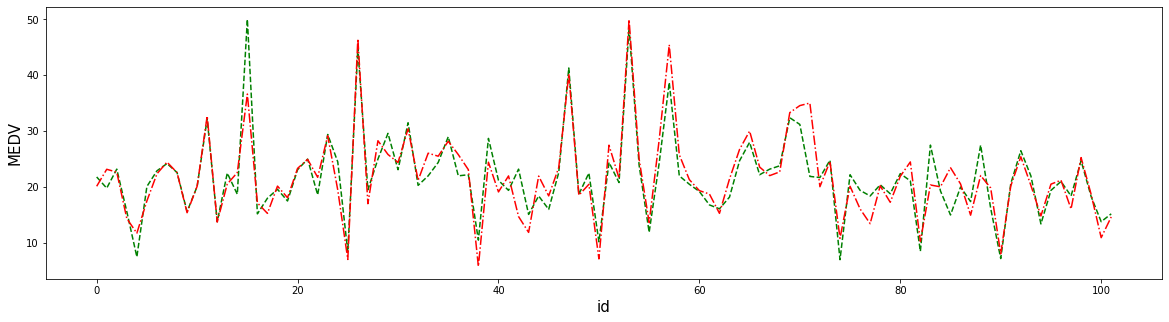

In [169]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, gb_reg_y_predict)

### 有数据增强 低

In [170]:
# training set
# Get the best parameters for the model
gb_reg = grid_search(GradientBoostingRegressor(), X_train_scaled, y_train, {'n_estimators':[10,50,100,200,300], 'max_depth':[3,4,5,6], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# Use the best model to make predictions
gb_reg_y_predict = gb_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
gb_score = r2_score(y_test, gb_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'n_estimators': 300, 'subsample': 1} for the optimal model.
Optimal model has best score 0.7820334933.
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 10, 'subsample': 1} Test score: 0.1542095667
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.5188732129
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.6313720824
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.7131009297
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.7099892438
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2, 'n_estimators': 10, 'subsample': 1} Test score: 0.2218304991
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0

array([23.85908197, 19.53749089, 25.4829634 , 22.40257261, 11.17271523,
       15.87778175, 22.23029643, 23.62997819, 25.0471689 , 16.38308878,
       19.08755327, 31.81870189, 17.34611417, 23.62215052, 23.31118704,
       44.56582599, 16.89158661, 17.70123428, 22.71927051, 18.48513418,
       23.11515388, 23.42664807, 25.92122982, 29.54622299, 28.02498856,
       16.83915014, 39.01036251, 19.63720107, 22.91594107, 28.56946349,
       25.40496196, 36.32857519, 19.39683172, 28.77872473, 27.13871712,
       27.32484737, 23.19031722, 23.6581729 ,  7.18388397, 23.25156279,
       19.91985853, 24.9643981 , 17.23788513, 13.15968972, 17.94348844,
       21.39036104, 21.87398613, 28.74608196, 17.34359059, 18.137383  ,
       11.09921083, 24.72701297, 21.42766599, 46.26744438, 24.43963692,
       12.59427402, 27.19627805, 34.83550392, 27.22874915, 20.9604003 ,
       19.65402743, 20.36923646, 15.02488481, 21.18651991, 25.37164053,
       25.31621481, 23.80628862, 24.52504137, 20.02969594, 28.64

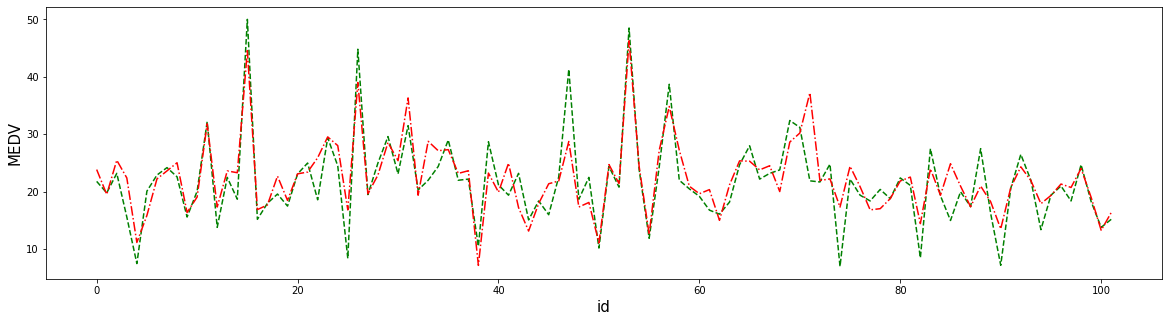

In [171]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, gb_reg_y_predict)

In [172]:
# testing set
gb_n_estimators = [10, 50, 100, 200, 300]
gb_max_depth = [3, 4, 5, 6]
gb_max_features = [1, 2, 3]
for i in gb_n_estimators:
    for j in gb_max_depth:
        for k in gb_max_features:
            # The gradient boosting regression module instantiates an object
            gb_reg = GradientBoostingRegressor(n_estimators=i, max_depth=j, max_features=k, subsample=1)
            # Fit the training set with the gradient boosting regression module
            gb_reg.fit(X_train, y_train)
            # Model evaluation
            gb_reg_y_predict = gb_reg.predict(X_test)
            gb_reg_score = r2_score(y_test, gb_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "max_depth:{:,}   ".format(j), "max_features:{:,}   ".format(k), "subsample:1   learning_rate:0.1   ", "R^2 score:{:,.10f}".format(gb_reg_score))

n_estimators:10    max_depth:3    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.4622361987
n_estimators:10    max_depth:3    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6006378427
n_estimators:10    max_depth:3    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6025331346
n_estimators:10    max_depth:4    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.4948075502
n_estimators:10    max_depth:4    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.5921402107
n_estimators:10    max_depth:4    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6645494485
n_estimators:10    max_depth:5    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.5360817831
n_estimators:10    max_depth:5    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6580921815
n_estimators:10    max_depth:5    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6979831749
n_estimato

### 方法十：AdaBoost log

### 无数据增强 高

In [173]:
# training set
# Get the best parameters for the model
ab_reg = grid_search(AdaBoostRegressor(), X_train, y_train_log, {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.05,0.1,0.3,1],'loss':['linear','square','exponential']})
# Use the best model to make predictions
ab_reg_y_predict = ab_reg.predict(X_test)
# Get the R^2 score of the trained model
ab_score = r2_score(y_test_log, ab_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ab_score))
ab_reg_y_predict

Parameters are {'learning_rate': 1, 'loss': 'square', 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.8412546886.
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50} Test score: 0.7734009953
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100} Test score: 0.8043469302
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200} Test score: 0.8027057568
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50} Test score: 0.7944811427
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100} Test score: 0.7980742822
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 200} Test score: 0.8134261549
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50} Test score: 0.7848228734
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100} Test score: 0.7885762431
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 200} Test score: 0.8042544521
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators

array([3.0780714 , 3.3044792 , 3.35361923, 2.80847298, 2.31900668,
       2.80736551, 3.07750608, 3.38638645, 3.12718563, 2.81265495,
       3.09437087, 3.41291965, 2.73490062, 3.09647816, 3.21501062,
       3.60946027, 2.93280106, 2.82535035, 3.05969041, 2.93194506,
       3.35535426, 3.40714881, 3.26283227, 3.4296566 , 3.04421114,
       2.25062713, 3.74915338, 2.87311168, 3.33220451, 3.14169551,
       3.36442283, 3.48284257, 3.12298586, 3.31727635, 3.38927587,
       3.4296566 , 3.09424821, 3.35432051, 2.04235456, 3.32526331,
       3.09647816, 3.07851806, 2.65096535, 2.59406595, 3.04149058,
       2.98682038, 3.0780714 , 3.610569  , 2.98566215, 2.97317509,
       2.12875474, 3.41525019, 3.10022694, 3.70146242, 3.27810678,
       2.37800017, 3.41765644, 3.65286663, 3.09647816, 3.12961585,
       3.08580647, 3.02982084, 2.77791446, 3.07269331, 3.37749561,
       3.46753078, 3.37749561, 3.09815612, 3.07877908, 3.53127316,
       3.48284257, 3.69997913, 3.02095809, 3.24762461, 2.52036

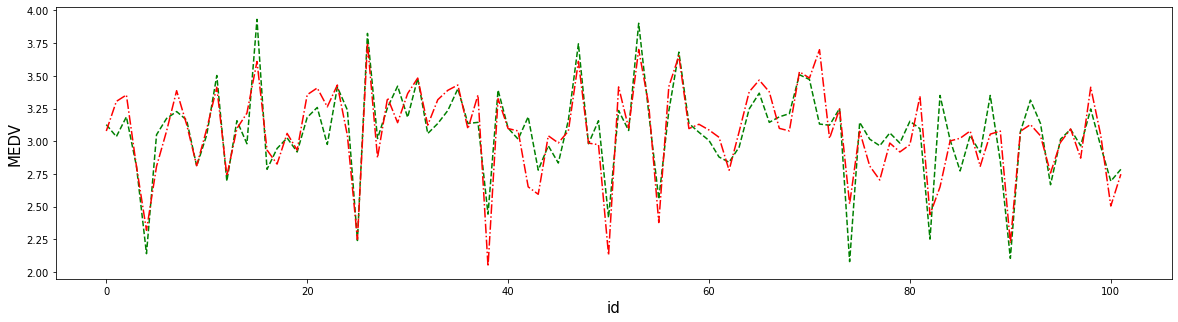

In [174]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ab_reg_y_predict)

### 有数据增强 低

In [175]:
# training set
# Get the best parameters for the model
ab_reg = grid_search(AdaBoostRegressor(), X_train_scaled, y_train_log, {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.05,0.1,0.3,1],'loss':['linear','square','exponential']})
# Use the best model to make predictions
ab_reg_y_predict = ab_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
ab_score = r2_score(y_test_log, ab_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ab_score))
ab_reg_y_predict

Parameters are {'learning_rate': 1, 'loss': 'square', 'n_estimators': 100} for the optimal model.
Optimal model has best score 0.7851370753.
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50} Test score: 0.6628752851
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100} Test score: 0.6819973202
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200} Test score: 0.6974326555
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50} Test score: 0.6877704585
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100} Test score: 0.6834442625
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 200} Test score: 0.7064555844
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50} Test score: 0.6682578330
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100} Test score: 0.6792786414
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 200} Test score: 0.6934785733
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators

array([3.09813137, 3.17802706, 3.20110079, 3.04367969, 2.34395142,
       2.91434745, 3.24742322, 3.10161426, 3.3176341 , 2.89894808,
       3.23553582, 3.34735328, 2.91434745, 3.09813137, 3.20110079,
       3.70141175, 2.86578237, 2.87814834, 3.16917995, 2.86925336,
       3.16451101, 3.09813137, 3.15808709, 3.25947789, 2.96588453,
       2.70689297, 3.67585012, 2.9166368 , 3.06693581, 3.24838416,
       3.25347553, 3.26362989, 2.97276108, 3.24742322, 3.17802706,
       3.30774   , 3.09743994, 3.32684334, 2.216993  , 3.09813137,
       2.97623225, 3.20110079, 2.86255566, 2.74557327, 2.86578237,
       3.05448585, 3.09665726, 3.50720758, 3.00628324, 2.90538306,
       2.32896412, 3.30774   , 3.07483776, 3.66887782, 3.07483776,
       2.60466475, 3.25347553, 3.63834321, 3.24838416, 3.10083763,
       2.96588453, 2.91605884, 2.7635571 , 3.15808709, 3.17802706,
       3.34563829, 3.18811738, 3.23553582, 3.07992596, 3.51253048,
       3.24833297, 3.50777056, 2.97623225, 3.17802706, 2.85451

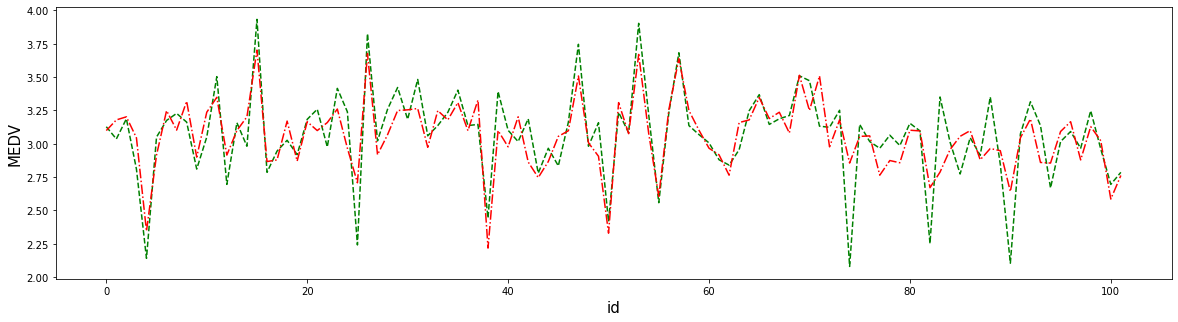

In [176]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test_log, ab_reg_y_predict)

In [177]:
# testing set
ab_n_estimators = [50, 100, 200]
ab_learning_rate = [0.01, 0.05, 0.1, 0.3, 1]
ab_loss = ['linear', 'square', 'exponential']
for i in ab_n_estimators:
    for j in ab_learning_rate:
        for k in ab_loss:
            # AdaBoost regression module instantiates an object
            ab_reg = AdaBoostRegressor(n_estimators=i, learning_rate=j, loss=k)
            # Fit the training set with the AdaBoost regression module
            ab_reg.fit(X_train, y_train_log)
            # Model evaluation
            ab_reg_y_predict = ab_reg.predict(X_test)
            ab_reg_score = r2_score(y_test_log, ab_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "learning_rate:{:,}   ".format(j),  "loss:{}   ".format(k),"R^2 score:{:,.10f}".format(ab_reg_score))

n_estimators:50    learning_rate:0.01    loss:linear    R^2 score:0.6757844625
n_estimators:50    learning_rate:0.01    loss:square    R^2 score:0.6622596412
n_estimators:50    learning_rate:0.01    loss:exponential    R^2 score:0.6510151418
n_estimators:50    learning_rate:0.05    loss:linear    R^2 score:0.6640567305
n_estimators:50    learning_rate:0.05    loss:square    R^2 score:0.6976575951
n_estimators:50    learning_rate:0.05    loss:exponential    R^2 score:0.6743073983
n_estimators:50    learning_rate:0.1    loss:linear    R^2 score:0.6846581698
n_estimators:50    learning_rate:0.1    loss:square    R^2 score:0.6898236907
n_estimators:50    learning_rate:0.1    loss:exponential    R^2 score:0.6880761186
n_estimators:50    learning_rate:0.3    loss:linear    R^2 score:0.6949864843
n_estimators:50    learning_rate:0.3    loss:square    R^2 score:0.6747666903
n_estimators:50    learning_rate:0.3    loss:exponential    R^2 score:0.6973187594
n_estimators:50    learning_rate:1    

## 6.3SVM

### 方法十一：SVR

### 无数据增强 高

In [178]:
# training set
# Get the best parameters for the model
svr_reg = grid_search(SVR(), X_train, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# Use the best model to make predictions
svr_reg_y_predict = svr_reg.predict(X_test)
# Get the R^2 score of the trained model
svr_score = r2_score(y_test, svr_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 50, 'gamma': 0.1} for the optimal model.
Optimal model has best score 0.8662486054.
{'C': 10, 'gamma': 0.01} Test score: 0.7811292139
{'C': 10, 'gamma': 0.1} Test score: 0.8181581087
{'C': 10, 'gamma': 0.125} Test score: 0.8087491585
{'C': 10, 'gamma': 0.25} Test score: 0.7629039553
{'C': 10, 'gamma': 0.5} Test score: 0.6834551518
{'C': 10, 'gamma': 1} Test score: 0.5509683296
{'C': 20, 'gamma': 0.01} Test score: 0.8107601630
{'C': 20, 'gamma': 0.1} Test score: 0.8494442077
{'C': 20, 'gamma': 0.125} Test score: 0.8443662561
{'C': 20, 'gamma': 0.25} Test score: 0.8026154560
{'C': 20, 'gamma': 0.5} Test score: 0.7345633840
{'C': 20, 'gamma': 1} Test score: 0.6197812614
{'C': 50, 'gamma': 0.01} Test score: 0.8374376343
{'C': 50, 'gamma': 0.1} Test score: 0.8662486054
{'C': 50, 'gamma': 0.125} Test score: 0.8579461468
{'C': 50, 'gamma': 0.25} Test score: 0.8192099532
{'C': 50, 'gamma': 0.5} Test score: 0.7493905126
{'C': 50, 'gamma': 1} Test score: 0.6319852771
{'C': 1

array([19.87152924, 20.49538081, 22.76739038, 12.54787684,  9.82736901,
       21.98367367, 21.29309241, 26.07090932, 24.42224271, 21.79482628,
       20.56534147, 37.58625319, 14.96653895, 22.55501123, 21.25131727,
       49.60950627, 16.67223368, 18.22640626, 21.03621126, 17.55021438,
       24.52687778, 25.86172233, 21.74697088, 33.28946477, 24.0598071 ,
        7.85099503, 48.37653217, 19.79218709, 21.3043241 , 27.84433588,
       25.26307779, 33.76602033, 20.40853171, 28.21604537, 25.91008698,
       29.85578926, 23.89266659, 24.13590474,  6.44070549, 31.65943457,
       21.489549  , 20.43729266, 15.3600287 , 14.13928301, 19.46629955,
       18.04453344, 23.23857755, 39.73238623, 18.71074118, 18.93600589,
        6.13525701, 28.09144119, 22.59007192, 50.13806378, 24.176318  ,
        9.23253001, 25.27232473, 43.06364439, 25.4097323 , 21.04417501,
       19.57099518, 20.35341696, 15.07724554, 19.77554318, 25.07224111,
       30.85570909, 24.88681986, 24.92096374, 22.3170558 , 34.00

In [179]:
# submission = {"prediction":svr_reg_y_predict}
# submission = pd.DataFrame(submission)
# submission.to_csv('svr_regression.csv')

In [180]:
# import joblib
# joblib.dump(svr_reg, "./test.pkl")

In [181]:
# estimator = joblib.load("./test.pkl")
# estimator_y_predict = estimator.predict(X_test)
# estimator_score = r2_score(y_test, estimator_y_predict)
# print("Optimal model has R^2 score {:,.10f} on test data.".format(estimator_score))
# X_train = transfer.fit_transform(X_train)
# X_test = transfer.fit_transform(X_test)
# print(X_test[0])
# X_test0 = [[]]
# X_test0[1][13]=X_test[0]
# X_test0[0] = X_test[0]
# print(X_test0)
# y_predict = estimator.predict(X_test0)
# print(y_predict)
# print(y_predict[0])
# estimator_y_predict

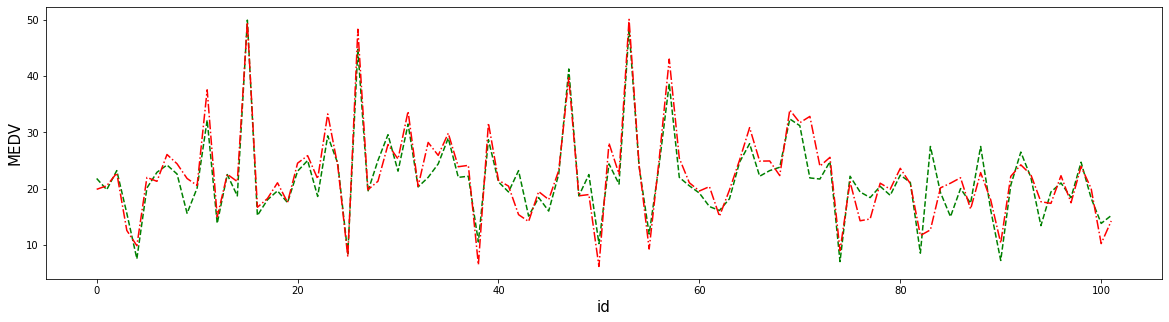

In [182]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, svr_reg_y_predict)

### 有数据增强 低

In [183]:
# training set
# Get the best parameters for the model
svr_reg = grid_search(SVR(), X_train_scaled, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# Use the best model to make predictions
svr_reg_y_predict = svr_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
svr_score = r2_score(y_test, svr_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 100, 'gamma': 0.01} for the optimal model.
Optimal model has best score 0.8645684855.
{'C': 10, 'gamma': 0.01} Test score: 0.8010347895
{'C': 10, 'gamma': 0.1} Test score: 0.5492510451
{'C': 10, 'gamma': 0.125} Test score: 0.5008860771
{'C': 10, 'gamma': 0.25} Test score: 0.3922005577
{'C': 10, 'gamma': 0.5} Test score: 0.3297913623
{'C': 10, 'gamma': 1} Test score: 0.2616565117
{'C': 20, 'gamma': 0.01} Test score: 0.8382139984
{'C': 20, 'gamma': 0.1} Test score: 0.6136445103
{'C': 20, 'gamma': 0.125} Test score: 0.5685536158
{'C': 20, 'gamma': 0.25} Test score: 0.4689384502
{'C': 20, 'gamma': 0.5} Test score: 0.4073685062
{'C': 20, 'gamma': 1} Test score: 0.3367003443
{'C': 50, 'gamma': 0.01} Test score: 0.8614814422
{'C': 50, 'gamma': 0.1} Test score: 0.6274674846
{'C': 50, 'gamma': 0.125} Test score: 0.5816690399
{'C': 50, 'gamma': 0.25} Test score: 0.4782924329
{'C': 50, 'gamma': 0.5} Test score: 0.4195948345
{'C': 50, 'gamma': 1} Test score: 0.3555154171
{'C':

array([18.33654988, 17.93832916, 23.04223578, 18.51899606,  9.7419551 ,
       15.98036643, 22.28875247, 24.18884814, 23.55341664, 16.03224263,
       18.87769034, 35.47417221, 19.35828364, 21.88033702, 19.51131713,
       49.0898491 , 16.08333096, 17.77426858, 18.98290123, 17.44103868,
       23.38088084, 25.73114854, 20.81960411, 30.31752379, 21.49852056,
        9.98690596, 41.79427984, 19.62123358, 19.50187411, 26.82386638,
       23.61746426, 32.41773247, 21.27121879, 25.64943612, 24.72237024,
       27.76518552, 22.85451152, 23.93502363,  6.26504591, 23.78526711,
       21.12220824, 21.81717101, 16.97107472, 13.90037731, 19.22904786,
       18.2024244 , 25.63762897, 32.84266216, 20.3906193 , 18.40056482,
        6.78213651, 24.90183894, 20.15437265, 48.38675758, 23.08712747,
       19.27749477, 26.73194208, 38.87465743, 26.57370558, 20.47313514,
       20.13613425, 20.05493399, 15.05883302, 19.08576782, 24.58572682,
       27.952842  , 25.09626458, 25.56185005, 19.9335175 , 33.93

In [184]:
# testing set
svr_C = [10, 20, 50, 100]
svr_gamma = [0.01, 0.1, 0.125, 0.25, 0.5 ,1]
for i in svr_C:
    for j in svr_gamma:
        # The SVR module instantiates an object
        svr_reg =SVR(C=i, gamma=j)
        # Fit on the training set with the SVR module
        svr_reg.fit(X_train, y_train)
        # Model evaluation
        svr_reg_y_predict = svr_reg.predict(X_test)
        svr_reg_score = r2_score(y_test, svr_reg_y_predict)
        print ("C:{:,}   ".format(i), "gamma:{:,}   ".format(j), "R^2 score:{:,.10f}".format(gb_reg_score))

C:10    gamma:0.01    R^2 score:0.7703197076
C:10    gamma:0.1    R^2 score:0.7703197076
C:10    gamma:0.125    R^2 score:0.7703197076
C:10    gamma:0.25    R^2 score:0.7703197076
C:10    gamma:0.5    R^2 score:0.7703197076
C:10    gamma:1    R^2 score:0.7703197076
C:20    gamma:0.01    R^2 score:0.7703197076
C:20    gamma:0.1    R^2 score:0.7703197076
C:20    gamma:0.125    R^2 score:0.7703197076
C:20    gamma:0.25    R^2 score:0.7703197076
C:20    gamma:0.5    R^2 score:0.7703197076
C:20    gamma:1    R^2 score:0.7703197076
C:50    gamma:0.01    R^2 score:0.7703197076
C:50    gamma:0.1    R^2 score:0.7703197076
C:50    gamma:0.125    R^2 score:0.7703197076
C:50    gamma:0.25    R^2 score:0.7703197076
C:50    gamma:0.5    R^2 score:0.7703197076
C:50    gamma:1    R^2 score:0.7703197076
C:100    gamma:0.01    R^2 score:0.7703197076
C:100    gamma:0.1    R^2 score:0.7703197076
C:100    gamma:0.125    R^2 score:0.7703197076
C:100    gamma:0.25    R^2 score:0.7703197076
C:100    gamma:0.5

### 6.4方法十二：K近邻

### 无数据增强 高

In [185]:
# training set
# Get the best parameters for the model
knn_reg = grid_search(KNeighborsRegressor(), X_train, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# Use the best model to make predictions
knn_reg_y_predict = knn_reg.predict(X_test)
# Get the R^2 score of the trained model
knn_score = r2_score(y_test, knn_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 2, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7992073573.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7773166813
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7992073573
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7528970176
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7828926306
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5980134330
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6504070754
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4927007021
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5584023006
Optimal model has R^2 score 0.7506150189 on test data.


array([20.87334007, 20.97900864, 24.83077808, 14.35673161,  7.91994102,
       20.08316087, 18.9       , 23.15397802, 24.12767545, 16.21036531,
       21.42933513, 43.14120429, 14.06232436, 22.25037019, 18.74598471,
       50.        , 15.05339763, 17.4938444 , 19.49920986, 18.34315548,
       22.91002214, 23.45351127, 22.78958991, 36.15561564, 21.54032728,
        7.9243468 , 47.54986182, 19.45980903, 21.19555254, 29.27153996,
       28.6328758 , 38.05656741, 20.61227775, 22.71896923, 25.53724315,
       26.35135165, 23.67968725, 24.19816285,  6.6957538 , 23.31997032,
       20.25980395, 23.83503983, 15.55907678, 13.24796983, 19.02398335,
       18.163155  , 26.470149  , 50.        , 18.602199  , 18.7828905 ,
        7.98408193, 27.53065698, 21.33239752, 50.        , 25.30633246,
        6.75084858, 20.78461397, 44.94160797, 27.10267562, 21.01200845,
       19.78826263, 19.58044055, 14.8509593 , 20.29241903, 23.41453741,
       28.0472898 , 24.59023769, 24.13485514, 20.14319096, 33.13

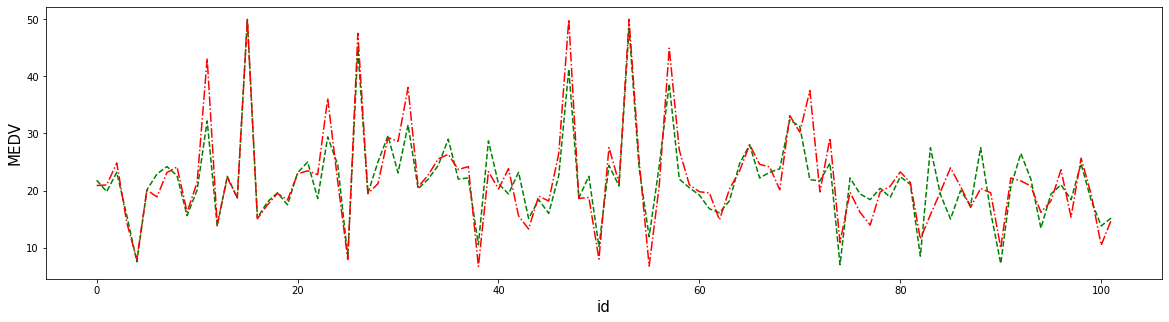

In [186]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, knn_reg_y_predict)

### 有数据增强 低

In [187]:
# training set
# Get the best parameters for the model
knn_reg = grid_search(KNeighborsRegressor(), X_train_scaled, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# Use the best model to make predictions
knn_reg_y_predict = knn_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
knn_score = r2_score(y_test, knn_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 10, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7506083139.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7112834089
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7143073138
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7030020742
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7506083139
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5820490262
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6478412464
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4639334218
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5443023989
Optimal model has R^2 score 0.7248185037 on test data.


array([23.75782914, 20.48405715, 26.46875588, 16.22142917,  9.96793128,
       24.03330109, 21.21200894, 23.66775217, 26.19762794, 18.45372263,
       21.3861878 , 36.20251639, 16.21643976, 24.08428221, 20.29661291,
       40.78586224, 14.63466645, 18.261903  , 22.74087617, 17.90474004,
       22.73894731, 22.62660313, 25.83775191, 27.12992032, 21.17192357,
       11.45084879, 40.34496782, 17.77735763, 19.17830115, 27.55395931,
       24.79598485, 28.12380951, 20.6270398 , 27.31834587, 24.51683288,
       26.9094298 , 20.49745902, 23.08743397, 12.30417274, 21.24219491,
       20.06736029, 28.57906162, 15.92086499, 13.25330757, 18.73120361,
       20.99988938, 23.48096127, 34.06354368, 17.40800393, 17.73042845,
       12.02864963, 28.61320712, 20.90751792, 45.94890678, 24.28173389,
       20.07992169, 33.0320154 , 38.11655038, 29.92032442, 19.6696351 ,
       19.85608582, 19.15281034, 13.76345271, 22.61096143, 24.50980324,
       24.10513947, 26.29448128, 24.57063823, 19.05587807, 29.37

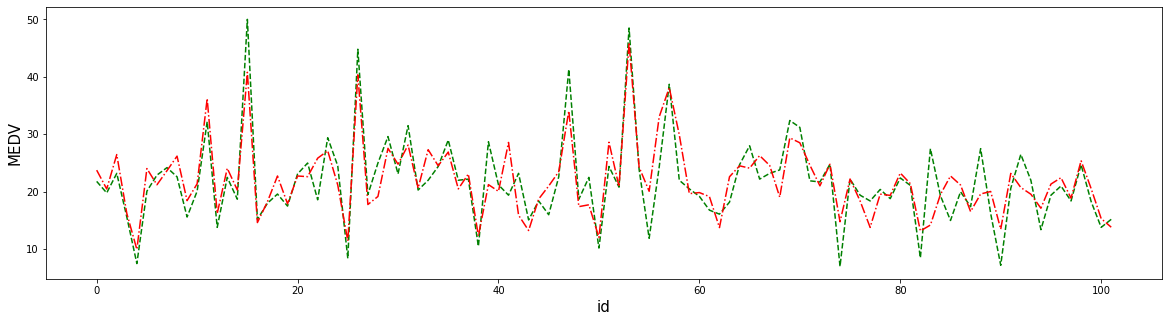

In [188]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, knn_reg_y_predict)

In [189]:
# testing set
knn_weights = ['uniform', 'distance']
knn_n_neighbors = [2, 10, 50 ,100]
for i in knn_weights:
    for j in knn_n_neighbors:
        # The KNeighbors regression module instantiates an object
        knn_reg =KNeighborsRegressor(weights=i, n_neighbors=j)
        # Fit on the training set with the KNeighbors regression module
        knn_reg.fit(X_train, y_train)
        # Model evaluation
        knn_reg_y_predict = knn_reg.predict(X_test)
        knn_reg_score = r2_score(y_test, knn_reg_y_predict)
        print ("weights:{}   ".format(i), "n_neighbors:{:,}   ".format(j), "R^2 score:{:,.10f}".format(gb_reg_score))

weights:uniform    n_neighbors:2    R^2 score:0.7703197076
weights:uniform    n_neighbors:10    R^2 score:0.7703197076
weights:uniform    n_neighbors:50    R^2 score:0.7703197076
weights:uniform    n_neighbors:100    R^2 score:0.7703197076
weights:distance    n_neighbors:2    R^2 score:0.7703197076
weights:distance    n_neighbors:10    R^2 score:0.7703197076
weights:distance    n_neighbors:50    R^2 score:0.7703197076
weights:distance    n_neighbors:100    R^2 score:0.7703197076


### 6.5方法十三：内核岭回归

### 无数据增强

In [190]:
# training set
# Get the best parameters for the model
kridge_reg = grid_search(KernelRidge(),X_train,y_train,{'alpha':[0.3,0.4,0.5,0.6,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# Use the best model to make predictions
kridge_reg_y_predict = kridge_reg.predict(X_test)
# Get the R^2 score of the trained model
kridge_score = r2_score(y_test, kridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8816650238.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8711053344
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8702103945
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8668731855
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8609338024
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8568511150
{'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8759010095
{'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8751285626
{'alpha': 0.4, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8720110516
{'alpha': 0.4, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8666393825
{'alpha': 0.4, 'coef0': 8, 'degree': 3, 'kernel'

array([24.44297955, 20.72907747, 24.28532545, 15.55751478,  7.027411  ,
       18.70658843, 20.9745426 , 26.69788697, 24.21075414, 14.62713738,
       21.28067667, 35.74156383, 18.34593805, 23.30766748, 21.64332136,
       56.9638935 , 15.30728125, 18.32742974, 23.62545916, 16.52478644,
       24.45060254, 25.57532217, 20.12469114, 32.61296685, 21.31713485,
        6.0289051 , 49.82106055, 18.10877812, 22.53019854, 25.96418869,
       26.40260839, 32.73642518, 20.9290007 , 27.41290184, 26.28183973,
       29.00872088, 24.71547373, 23.85789955,  3.38530598, 28.02370903,
       20.98244776, 20.59708919, 14.10983493, 16.32511834, 17.74564134,
       17.6696845 , 22.71549123, 39.95684277, 17.83909082, 17.91459286,
        4.97314672, 27.30007309, 21.71473905, 55.22590919, 24.85683138,
       11.77027576, 29.31831877, 48.99023881, 26.5480726 , 20.13260083,
       20.81331038, 18.75292452, 14.64929889, 19.87015127, 26.09550949,
       30.28913504, 25.27095534, 24.62279425, 25.19843193, 34.57

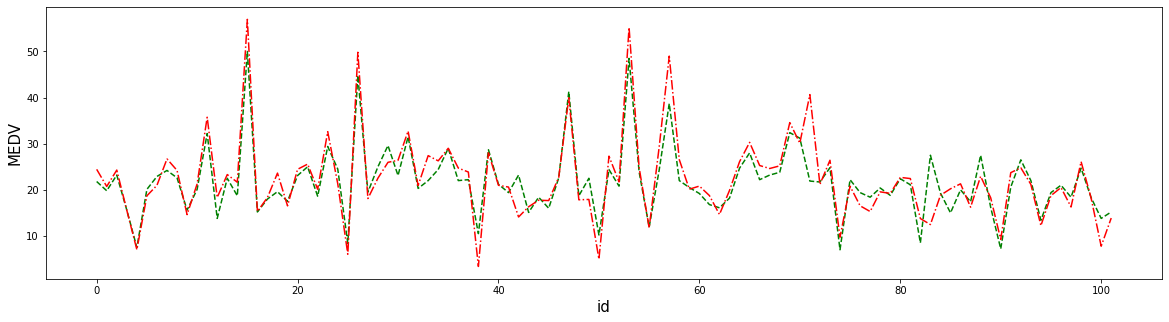

In [191]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, kridge_reg_y_predict)

### 有数据增强

In [192]:
# training set
# Get the best parameters for the model
kridge_reg = grid_search(KernelRidge(),X_train_scaled,y_train,{'alpha':[0.3,0.4,0.5,0.6,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# Use the best model to make predictions
kridge_reg_y_predict = kridge_reg.predict(test_X_scaled)
# Get the R^2 score of the trained model
kridge_score = r2_score(y_test, kridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8716064707.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8637464675
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8613739066
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8477819235
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8114925914
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.7820395945
{'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8675497624
{'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8660624015
{'alpha': 0.4, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8552146253
{'alpha': 0.4, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8243842011
{'alpha': 0.4, 'coef0': 8, 'degree': 3, 'kernel': 

array([18.91927413, 19.05565385, 24.10934089, 16.46254956,  9.61144081,
       17.99817257, 21.93212705, 24.47152724, 25.11944251, 13.54099184,
       20.04293333, 34.6519182 , 19.73320457, 21.95533275, 20.03631785,
       48.91373355, 15.72088599, 18.91201803, 21.42992524, 16.49005633,
       22.74999964, 24.13638193, 21.19182675, 30.03156488, 21.62659188,
        5.39031182, 42.62474057, 17.87742759, 20.68807592, 26.93919889,
       23.41992907, 31.41983748, 20.99004424, 24.88368272, 24.87620816,
       28.50301407, 21.99039746, 23.27318422,  6.22266174, 23.6684088 ,
       20.36853416, 19.96544448, 15.50448855, 14.3081282 , 18.90231679,
       17.41750212, 25.82180763, 32.32806249, 18.98786745, 18.20126088,
        7.06993534, 25.58146494, 20.36085483, 48.6357014 , 23.83440613,
       17.83560103, 27.80413719, 39.53513065, 27.70120641, 20.00106073,
       20.03005154, 20.68726352, 14.74298805, 18.54687197, 25.03074832,
       27.31752527, 24.72577836, 25.48612038, 21.02606579, 33.54

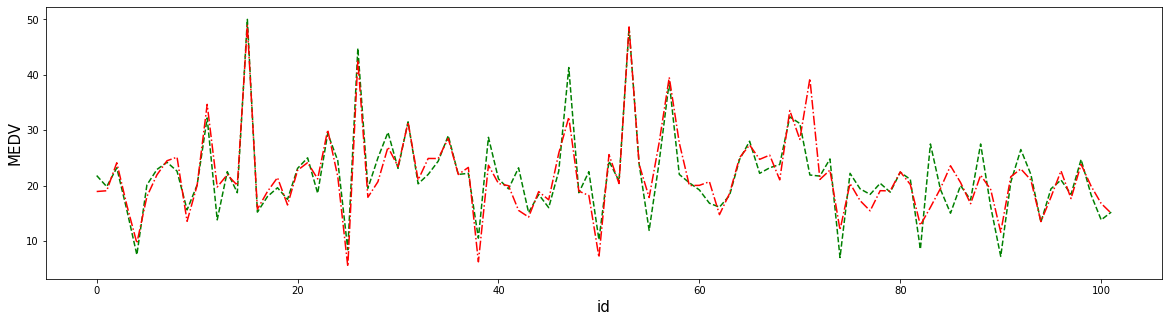

In [193]:
# Visualize a comparison of real and predicted house prices
figure_prediction(y_test, kridge_reg_y_predict)

In [194]:
# testing set
kridge_alpha = [0.3, 0.4, 0.5, 0.6, 0.7]
kridge_coef0 = [0.8, 1, 2, 5, 8]
for i in kridge_alpha:
    for j in kridge_coef0:
        # The kernel ridge regression module instantiates an object
        kridge_reg = KernelRidge(alpha=i, coef0=j, kernel = 'polynomial', degree=3)#(alpha表示正则的程度）
        # Fit on the training set with the kernel ridge regression module
        kridge_reg.fit(X_train, y_train)
        # Model evaluation
        kridge_reg_y_predict = kridge_reg.predict(X_test)
        kridge_reg_score = r2_score(y_test, kridge_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "coef0:{:,}   ".format(j), "kernel:polynomial   degree:3   ""R^2 score:{:,.10f}".format(kridge_reg_score))

alpha:0.3    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7759245821
alpha:0.3    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7717008320
alpha:0.3    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7577021636
alpha:0.3    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7317054269
alpha:0.3    coef0:8    kernel:polynomial   degree:3   R^2 score:0.7084900678
alpha:0.4    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7683609180
alpha:0.4    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7662448768
alpha:0.4    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7571757880
alpha:0.4    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7414990493
alpha:0.4    coef0:8    kernel:polynomial   degree:3   R^2 score:0.7260975136
alpha:0.5    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7594549584
alpha:0.5    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7589596815
alpha:0.5    coef0:2    kernel:polynomial   degree:3   R^2

### 有数据增强R^2高：
线性回归                                  
岭回归                                                  
随机参数回归          
贝叶斯岭回归          
Lasso回归              
ElasticNet回归         
内核岭回归 

### 无数据增强R^2高：
随机森林  
极端随机森林  
梯度提升回归  
AdaBoost  
SVR 
K近邻


